**Problématique : Analyse comparative : Santé**

Comment les indicateurs de santé varient-ils en fonction de diverses caractéristiques démographiques et sociales à travers différents pays européens ?

**Présenté par :**
- LAALIJI Zakariae
- HNIOUA Abdessamad
- OUADOUD Hamza

**Encadré par :**
- M. OUAARAB Aziz

**Introduction**

La santé est un indicateur clé du bien-être des populations, influencée par une multitude de facteurs sociaux, économiques et environnementaux. En Europe, bien que la majorité des pays bénéficient d'un accès relativement large aux soins de santé, des disparités existent entre les différentes nations et au sein même de leurs populations. Ces disparités peuvent être liées à des facteurs tels que l'âge, le statut socio-économique, les habitudes de vie ou encore l'organisation des systèmes de santé.

Cette analyse comparative se concentre sur la diversité des indicateurs de santé à travers différents groupes d'âge et en fonction des pays européens. Nous cherchons à comprendre comment ces facteurs contribuent à façonner les conditions sanitaires dans cette région et à identifier les écarts de santé qui peuvent exister entre les nations. Ce travail permet ainsi d'étudier les tendances générales de la santé en Europe et de souligner les enjeux de la santé publique dans cette zone géographique.


# **Les méthodes de tests statistiques**

In [ ]:
#Préparation des bibliothèques nécessaires
!pip install eurostat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score
import statsmodels.api as sm
from scipy import stats
from sklearn.cluster import KMeans, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
import requests
import eurostat

## Test T

Indice de masse corporelle (IMC) par sexe, âge et niveau d'éducation atteint: Test paramétrique

Le but de cet atelier est de comparer les profils de l'IMC (Indice de Masse Corporelle) entre deux groupes de pays, dans ce cas, les pays nordiques et les pays sudiques.

#### **Collecte des données**

In [ ]:
df_hlth_ehis_bm1e = eurostat.get_data_df('hlth_ehis_bm1e')
df_hlth_ehis_bm1e.head(100)

,freq,unit,bmi,isced11,sex,age,geo\TIME_PERIOD,2014,2019
0,A,PC,BMI18P5-24,ED0-2,F,TOTAL,AT,45.6,40.9
1,A,PC,BMI18P5-24,ED0-2,F,TOTAL,BE,45.7,41.0
2,A,PC,BMI18P5-24,ED0-2,F,TOTAL,BG,44.3,48.1
3,A,PC,BMI18P5-24,ED0-2,F,TOTAL,CY,43.8,39.6
4,A,PC,BMI18P5-24,ED0-2,F,TOTAL,CZ,42.6,46.2
...,...,...,...,...,...,...,...,...,...
95,A,PC,BMI18P5-24,ED0-2,F,Y15-24,RO,78.1,80.8
96,A,PC,BMI18P5-24,ED0-2,F,Y15-24,RS,NaN,66.8
97,A,PC,BMI18P5-24,ED0-2,F,Y15-24,SE,72.1,70.9
98,A,PC,BMI18P5-24,ED0-2,F,Y15-24,SI,73.4,78.0


In [ ]:
df_hlth_ehis_bm1e.columns

Index(['freq', 'unit', 'bmi', 'isced11', 'sex', 'age', 'geo\TIME_PERIOD',
       '2014', '2019'],
      dtype='object')

In [ ]:
# Liste des colonnes à examiner
columns_of_interest = ['freq', 'unit', 'bmi', 'isced11', 'sex', 'age', 'geo\TIME_PERIOD']

# Répertorier les valeurs uniques pour les colonnes spécifiées (autres que 'geo\TIME_PERIOD')
for column in columns_of_interest[:-1]:  # Exclure 'geo\TIME_PERIOD' pour éviter de traiter deux fois
    unique_values = df_hlth_ehis_bm1e[column].unique()
    print(f"\nColonne : {column}")
    print(f"Valeurs uniques : {unique_values}")

# Dictionnaire de mapping des codes de pays vers les noms complets
country_names = {
    'AT': 'Autriche', 'BE': 'Belgique', 'BG': 'Bulgarie', 'CY': 'Chypre', 'CZ': 'République tchèque',
    'DE': 'Allemagne', 'DK': 'Danemark', 'EE': 'Estonie', 'EL': 'Grèce', 'ES': 'Espagne',
    'EU27_2020': 'Union européenne (27 pays)', 'EU28': 'Union européenne (28 pays)', 'FI': 'Finlande',
    'FR': 'France', 'HR': 'Croatie', 'HU': 'Hongrie', 'IE': 'Irlande', 'IS': 'Islande', 'IT': 'Italie',
    'LT': 'Lituanie', 'LU': 'Luxembourg', 'LV': 'Lettonie', 'MT': 'Malte', 'NL': 'Pays-Bas', 'NO': 'Norvège',
    'PL': 'Pologne', 'PT': 'Portugal', 'RO': 'Roumanie', 'RS': 'Serbie', 'SE': 'Suède', 'SI': 'Slovénie',
    'SK': 'Slovaquie', 'TR': 'Turquie', 'UK': 'Royaume-Uni'
}

# Fonction pour mapper les codes de pays aux noms complets
def map_country_codes(code):
    return country_names.get(code, code)  # Retourne le code si pas trouvé dans le dictionnaire

# Appliquer la fonction sur la colonne 'geo\TIME_PERIOD' pour obtenir les noms complets des pays
df_hlth_ehis_bm1e['pays'] = df_hlth_ehis_bm1e['geo\TIME_PERIOD'].apply(map_country_codes)

# Afficher les valeurs uniques des pays après mapping
print(f"\nValeurs uniques après mapping des pays :")
print(df_hlth_ehis_bm1e['pays'].unique())



Colonne : freq
Valeurs uniques : ['A']

Colonne : unit
Valeurs uniques : ['PC']

Colonne : bmi
Valeurs uniques : ['BMI18P5-24' 'BMI25-29' 'BMI_GE25' 'BMI_GE30' 'BMI_LT18P5']

Colonne : isced11
Valeurs uniques : ['ED0-2' 'ED3_4' 'ED5-8' 'TOTAL']

Colonne : sex
Valeurs uniques : ['F' 'M' 'T']

Colonne : age
Valeurs uniques : ['TOTAL' 'Y15-19' 'Y15-24' 'Y15-29' 'Y15-64' 'Y18-24' 'Y18-29' 'Y18-44'
 'Y18-64' 'Y20-24' 'Y25-29' 'Y25-34' 'Y25-64' 'Y35-44' 'Y45-54' 'Y45-64'
 'Y55-64' 'Y65-74' 'Y_GE18' 'Y_GE65' 'Y_GE75']

Valeurs uniques après mapping des pays :
['Autriche' 'Belgique' 'Bulgarie' 'Chypre' 'République tchèque'
 'Allemagne' 'Danemark' 'Estonie' 'Grèce' 'Espagne'
 'Union européenne (27 pays)' 'Union européenne (28 pays)' 'Finlande'
 'France' 'Croatie' 'Hongrie' 'Irlande' 'Islande' 'Italie' 'Lituanie'
 'Luxembourg' 'Lettonie' 'Malte' 'Pays-Bas' 'Norvège' 'Pologne' 'Portugal'
 'Roumanie' 'Serbie' 'Suède' 'Slovénie' 'Slovaquie' 'Turquie'
 'Royaume-Uni']


- **freq** : fréquence (annuel)
- **unit** : unité (pourcentage %)
- **bmi** : Indice de masse corporelle (IMC)
  - BMI_LT18P5 : Insuffisance pondérale
  - BMI18P5-24 : Normal
  - BMI_GE25 : Surcharge pondérale
  - BMI25-29 : Surpoids
  - BMI_GE30 : Obèse
- **isced11** : Classification Internationale Type de l'Education (CITE 2011)
  - TOTAL : Ensemble des niveaux de la CITE 2011
  - ED0-2 : Inférieur à l'enseignement primaire, enseignement primaire et premier cycle de l'enseignement secondaire (niveaux 0-2)
  - ED3_4 : Deuxième cycle de l'enseignement secondaire et enseignement post-secondaire non-supérieur (niveaux 3 et 4)
  - ED5-8 : Enseignement supérieur (niveaux 5-8)
- **sex**
  - F : Female
  - M : Male
  - T : TOTAL
- **age**
  - Y15-24 : de 15 ans à 24 ans
  - Y25-34 : de 25 ans à 34 ans
  - Y35-44 : de 35 ans à 44 ans
  - TOTAL

#### **Nettoyage des données**

In [ ]:
# Dictionnaire de correspondance pour les catégories de bmi
bmi_names = {
    'BMI18P5-24': 'Normal',
    'BMI25-29': 'Surpoids',
    'BMI_GE25': 'Surcharge pondérale',
    'BMI_GE30': 'Obèse',
    'BMI_LT18P5': 'Insuffisance pondérale',
}

# Renommer les colonnes
df_hlth_ehis_bm1e = df_hlth_ehis_bm1e.rename(columns={'bmi': 'Indice de masse corporelle'})

# Filtrer les données
df_filtered = df_hlth_ehis_bm1e[
    (df_hlth_ehis_bm1e['sex'] == 'T') &
    (df_hlth_ehis_bm1e['isced11'] == 'TOTAL') &
    (df_hlth_ehis_bm1e['age'] == 'TOTAL')
]

# Remplacer les catégories de smoking par des descriptions
df_filtered['Indice de masse corporelle'] = df_filtered['Indice de masse corporelle'].map(bmi_names)

# Afficher les premières lignes du dataframe filtré
df_filtered.head(100)


<ipython-input-5-0c772440150a>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Indice de masse corporelle'] = df_filtered['Indice de masse corporelle'].map(bmi_names)


,freq,unit,Indice de masse corporelle,isced11,sex,age,geo\TIME_PERIOD,2014,2019,pays
7810,A,PC,Normal,TOTAL,T,TOTAL,AT,50.4,46.3,Autriche
7811,A,PC,Normal,TOTAL,T,TOTAL,BE,48.8,48.0,Belgique
7812,A,PC,Normal,TOTAL,T,TOTAL,BG,44.6,44.1,Bulgarie
7813,A,PC,Normal,TOTAL,T,TOTAL,CY,49.2,47.7,Chypre
7814,A,PC,Normal,TOTAL,T,TOTAL,CZ,43.3,40.0,République tchèque
...,...,...,...,...,...,...,...,...,...,...
24877,A,PC,Surcharge pondérale,TOTAL,T,TOTAL,RO,53.9,56.4,Roumanie
24878,A,PC,Surcharge pondérale,TOTAL,T,TOTAL,RS,NaN,52.4,Serbie
24879,A,PC,Surcharge pondérale,TOTAL,T,TOTAL,SE,47.7,49.6,Suède
24880,A,PC,Surcharge pondérale,TOTAL,T,TOTAL,SI,55.0,56.6,Slovénie


In [ ]:
# Transformer les données pour obtenir une seule colonne de valeurs
df_filtered = df_filtered.melt(
    id_vars=['freq', 'unit', 'Indice de masse corporelle', 'isced11', 'sex', 'age', 'geo\TIME_PERIOD', 'pays'],
    value_vars=['2019'],
    var_name='année',
    value_name='values'
)

# Filtrer pour garder uniquement les lignes avec des valeurs non nulles
df_filtered = df_filtered.dropna(subset=['values'])

# Supprimer les colonnes non nécessaires
columns_to_drop = ['freq', 'unit', 'sex', 'age', 'isced11', 'année', 'geo\TIME_PERIOD']
df_filtered = df_filtered.drop(columns=columns_to_drop)

# Réorganiser les colonnes pour plus de clarté
df_filtered = df_filtered[['pays', 'Indice de masse corporelle', 'values']]

# Trier par pays et IMC
df_filtered = df_filtered.sort_values(['pays', 'Indice de masse corporelle'])

# Afficher les résultats
print(df_filtered.head(100))

          pays Indice de masse corporelle  values
141  Allemagne     Insuffisance pondérale     2.7
5    Allemagne                     Normal    45.2
107  Allemagne                      Obèse    18.5
73   Allemagne        Surcharge pondérale    52.1
39   Allemagne                   Surpoids    33.6
..         ...                        ...     ...
160    Norvège     Insuffisance pondérale     2.0
24     Norvège                     Normal    48.4
126    Norvège                      Obèse    13.8
92     Norvège        Surcharge pondérale    49.6
58     Norvège                   Surpoids    35.7

[100 rows x 3 columns]


In [ ]:
df_filtered.to_csv('df_filtered_imc.csv', index=False)

In [ ]:
# Compter les valeurs manquantes (nulles et NaN) pour chaque colonne
valeurs_manquantes = df_filtered.isnull().sum()

# Afficher les résultats des valeurs manquantes
print("Valeurs manquantes pour chaque colonne :")
print(valeurs_manquantes)

# Compter les occurrences des différentes classes dans la colonne 'Indice de masse corporelle'
occurrences_classes = df_filtered['Indice de masse corporelle'].value_counts()

# Afficher les résultats des occurrences des classes
print("\nOccurrences des différentes classes dans 'Indice de masse corporelle' :")
print(occurrences_classes)

Valeurs manquantes pour chaque colonne :
pays                          0
Indice de masse corporelle    0
values                        0
dtype: int64

Occurrences des différentes classes dans 'Indice de masse corporelle' :
Indice de masse corporelle
Insuffisance pondérale    31
Normal                    31
Obèse                     31
Surcharge pondérale       31
Surpoids                  31
Name: count, dtype: int64


In [ ]:
# Liste des pays à filtrer
pays_a_extraire = ['Suède', 'Danemark', 'Finlande', 'Islande', 'Norvège', 'Espagne', 'Portugal', 'Italie', 'Grèce', 'Chypre']

# Filtrer les données en fonction des pays
df_pays_extraite = df_filtered[df_filtered['pays'].isin(pays_a_extraire)]

# Afficher le DataFrame filtré
print(df_pays_extraite.head(20))

         pays Indice de masse corporelle  values
139    Chypre     Insuffisance pondérale     3.9
3      Chypre                     Normal    47.7
105    Chypre                      Obèse    14.6
71     Chypre        Surcharge pondérale    48.5
37     Chypre                   Surpoids    33.8
142  Danemark     Insuffisance pondérale     2.3
6    Danemark                     Normal    48.8
108  Danemark                      Obèse    15.9
74   Danemark        Surcharge pondérale    48.8
40   Danemark                   Surpoids    32.9
145   Espagne     Insuffisance pondérale     2.4
9     Espagne                     Normal    45.3
111   Espagne                      Obèse    15.4
77    Espagne        Surcharge pondérale    52.3
43    Espagne                   Surpoids    36.9
148  Finlande     Insuffisance pondérale     1.7
12   Finlande                     Normal    40.6
114  Finlande                      Obèse    20.3
80   Finlande        Surcharge pondérale    57.7
46   Finlande       

In [ ]:
df_pays_extraite.to_csv('df_pays_extraite_imc.csv', index=False)

In [ ]:
# Pivotage du DataFrame en conservant 'pays' comme index
df_pivot = df_pays_extraite.pivot(index='pays', columns='Indice de masse corporelle', values='values')

# Afficher le résultat du pivotage
print(df_pivot)

Indice de masse corporelle  Insuffisance pondérale  Normal  Obèse  \
pays                                                                
Chypre                                         3.9    47.7   14.6   
Danemark                                       2.3    48.8   15.9   
Espagne                                        2.4    45.3   15.4   
Finlande                                       1.7    40.6   20.3   
Grèce                                          1.4    42.3   16.2   
Islande                                        1.4    38.5   21.7   
Italie                                         3.9    51.4   11.4   
Norvège                                        2.0    48.4   13.8   
Portugal                                       2.0    43.4   17.2   
Suède                                          2.4    48.0   14.7   

Indice de masse corporelle  Surcharge pondérale  Surpoids  
pays                                                       
Chypre                                     48.5    

In [ ]:
df_pivot.to_csv('df_pivot_imc.csv')

### **Application du test t**

Avant de lancer ces tests statistiques, il est important de poser clairement les hypothèses. Je vais détailler cela pour les deux types de tests utilisés.

Pour le Test de Shapiro-Wilk (test de normalité) :  

- H0 (hypothèse nulle) : Les données suivent une distribution normale  
- H1 (hypothèse alternative) : Les données ne suivent pas une distribution normale  
- Seuil α = 0.05  

Pour le Test T indépendant (comparaison des moyennes) :  

- H0 : Il n'y a pas de différence significative entre les moyennes des deux groupes (µnord = µsud)  
- H1 : Il existe une différence significative entre les moyennes des deux groupes (µnord ≠ µsud)  
- Seuil α = 0.05  


In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

# Définir les groupes de pays
pays_nordiques = ['Suède', 'Danemark', 'Finlande', 'Islande', 'Norvège']
pays_sudiques = ['Espagne', 'Portugal', 'Italie', 'Grèce', 'Chypre']

# Créer deux DataFrames distincts
df_nord = df_pivot.loc[pays_nordiques]
df_sud = df_pivot.loc[pays_sudiques]

# Test de normalité pour chaque catégorie d'IMC
categories_imc = ['Insuffisance pondérale', 'Normal', 'Obèse', 'Surcharge pondérale', 'Surpoids']

print("Tests de normalité (Shapiro-Wilk)")
print("-" * 50)
for cat in categories_imc:
    print(f"\nCatégorie: {cat}")

    # Test pour pays nordiques
    stat_nord, p_nord = stats.shapiro(df_nord[cat])
    print(f"Pays nordiques - Statistique: {stat_nord:.3f}, p-value: {p_nord:.3f}")

    # Test pour pays sudiques
    stat_sud, p_sud = stats.shapiro(df_sud[cat])
    print(f"Pays sudiques - Statistique: {stat_sud:.3f}, p-value: {p_sud:.3f}")

# Test T pour chaque catégorie
print("\nRésultats des Tests T")
print("-" * 50)
for cat in categories_imc:
    t_stat, p_val = stats.ttest_ind(df_nord[cat], df_sud[cat])
    print(f"\nCatégorie: {cat}")
    print(f"Statistique t: {t_stat:.3f}")
    print(f"p-value: {p_val:.3f}")
    print(f"Moyenne pays nordiques: {df_nord[cat].mean():.2f}")
    print(f"Moyenne pays sudiques: {df_sud[cat].mean():.2f}")

Tests de normalité (Shapiro-Wilk)
--------------------------------------------------

Catégorie: Insuffisance pondérale
Pays nordiques - Statistique: 0.947, p-value: 0.715
Pays sudiques - Statistique: 0.873, p-value: 0.280

Catégorie: Normal
Pays nordiques - Statistique: 0.789, p-value: 0.066
Pays sudiques - Statistique: 0.948, p-value: 0.720

Catégorie: Obèse
Pays nordiques - Statistique: 0.884, p-value: 0.326
Pays sudiques - Statistique: 0.920, p-value: 0.530

Catégorie: Surcharge pondérale
Pays nordiques - Statistique: 0.792, p-value: 0.070
Pays sudiques - Statistique: 0.954, p-value: 0.766

Catégorie: Surpoids
Pays nordiques - Statistique: 0.982, p-value: 0.946
Pays sudiques - Statistique: 0.932, p-value: 0.609

Résultats des Tests T
--------------------------------------------------

Catégorie: Insuffisance pondérale
Statistique t: -1.406
p-value: 0.197
Moyenne pays nordiques: 1.96
Moyenne pays sudiques: 2.72

Catégorie: Normal
Statistique t: -0.424
p-value: 0.683
Moyenne pays nor

Tests de Shapiro-Wilk (α = 0.05)  

Pour chaque catégorie, on interprète les p-values > 0.05 comme ne permettant pas de rejeter H0 :  

**Insuffisance pondérale :**  
- **Pays nordiques** (p = 0.715 > 0.05) : On ne rejette pas H0 → distribution normale  
- **Pays sudiques** (p = 0.280 > 0.05) : On ne rejette pas H0 → distribution normale  

**Poids normal :**  
- **Pays nordiques** (p = 0.066 > 0.05) : On ne rejette pas H0 → distribution normale  
- **Pays sudiques** (p = 0.720 > 0.05) : On ne rejette pas H0 → distribution normale  

**Obésité :**  
- **Pays nordiques** (p = 0.326 > 0.05) : On ne rejette pas H0 → distribution normale  
- **Pays sudiques** (p = 0.530 > 0.05) : On ne rejette pas H0 → distribution normale  

**Surcharge pondérale :**  
- **Pays nordiques** (p = 0.070 > 0.05) : On ne rejette pas H0 → distribution normale  
- **Pays sudiques** (p = 0.766 > 0.05) : On ne rejette pas H0 → distribution normale  

**Surpoids :**  
- **Pays nordiques** (p = 0.946 > 0.05) : On ne rejette pas H0 → distribution normale  
- **Pays sudiques** (p = 0.609 > 0.05) : On ne rejette pas H0 → distribution normale  

---

Tests T (α = 0.05)  

D'après l'analyse statistique des données d'IMC entre les pays nordiques et sudiques de l'Europe, voici les conclusions claires par catégorie :  

**Insuffisance pondérale :**  
- Il n'y a pas de différence significative dans la prévalence de l'insuffisance pondérale entre les pays nordiques (1.96%) et sudiques (2.72%).  
- Cependant, les pays du Sud présentent un taux légèrement plus élevé.  

**Poids normal :**  
- La proportion de personnes ayant un poids normal est similaire entre les pays nordiques (44.86%) et sudiques (46.02%).  
- Cette différence mineure n'est pas statistiquement significative.  

**Obésité :**  
- Bien que les pays nordiques affichent un taux d'obésité plus élevé (17.28%) que les pays sudiques (14.96%), cette différence n'est pas statistiquement significative.  

**Surcharge pondérale :**  
- Les taux de surcharge pondérale sont comparables entre les pays nordiques (53.16%) et sudiques (51.24%).  
- Aucune différence statistique significative n'est observée.  

**Surpoids :**  
- La prévalence du surpoids est pratiquement identique entre les régions :  
  - **Pays nordiques** : 35.86%  
  - **Pays sudiques** : 36.26%  

---

**Conclusion générale :**  
Contrairement aux idées reçues sur les différences alimentaires et de mode de vie entre l'Europe du Nord et du Sud, les profils d'IMC sont remarquablement similaires dans ces deux régions.  
Aucune catégorie de poids ne montre de différence statistiquement significative, suggérant une certaine homogénéité dans la distribution des IMC à travers l'Europe.  


## Test de Mann-Whitney

Difficultés relatives aux activités de soins personnels ou aux activités domestiques par sexe, âge et niveau d'éducation atteint

**Cette étude visait à analyser les différences dans les activités de soins personnels et domestiques entre différents pays européens, en se concentrant sur les personnes âgées (55 ans et plus) avec différents niveaux de handicap.**

### **Collecte des données**

In [ ]:
# Définir le code et la description
code = 'hlth_ehis_tae'
description = "Difficultés relatives aux activités de soins personnels ou aux activités domestiques par sexe, âge et niveau d'éducation atteint"

try:
    # Récupérer les données d'Eurostat
    df = eurostat.get_data_df(code)

    # Afficher le titre descriptif
    print(f"\n{description} ({code}):")

    # Afficher les premières lignes du dataframe
    print(df.head())
except Exception as e:
    # Gestion des erreurs si la table ne peut pas être récupérée
    print(f"Erreur lors de la récupération des données pour le code '{code}': {e}")



Difficultés relatives aux activités de soins personnels ou aux activités domestiques par sexe, âge et niveau d'éducation atteint (hlth_ehis_tae):
  freq lev_diff sex     age isced11 unit geo\TIME_PERIOD  2014  2019
0    A      LTD   F  Y55-64   ED0-2   PC              AT   NaN  33.5
1    A      LTD   F  Y55-64   ED0-2   PC              BE   NaN  36.1
2    A      LTD   F  Y55-64   ED0-2   PC              BG   NaN  46.8
3    A      LTD   F  Y55-64   ED0-2   PC              CY   NaN  33.7
4    A      LTD   F  Y55-64   ED0-2   PC              CZ   NaN  47.9


- **freq** : fréquence (annuel)
- **unit** : unité (pourcentage %)
- **lev_diff** : Niveau de difficulté
  - MOD : Modéré
  - LTD : Limité
  - SEV : Sevère
  - NONE : Aucun
- **isced11** : Classification Internationale Type de l'Education (CITE 2011)
  - TOTAL : Ensemble des niveaux de la CITE 2011
  - ED0-2 : Inférieur à l'enseignement primaire, enseignement primaire et premier cycle de l'enseignement secondaire (niveaux 0-2)
  - ED3_4 : Deuxième cycle de l'enseignement secondaire et enseignement post-secondaire non-supérieur (niveaux 3 et 4)
  - ED5-8 : Enseignement supérieur (niveaux 5-8)
- **sex**
  - F : Female
  - M : Male
  - T : TOTAL
- **age**
  - Y15-24 : de 15 ans à 24 ans
  - Y25-34 : de 25 ans à 34 ans
  - Y35-44 : de 35 ans à 44 ans
  - ...
  - TOTAL

### **Nettoyage des données**

In [ ]:
# Dictionnaire pour mapper les codes pays aux noms complets en français
country_mapping = {
    'AT': 'Autriche',
    'BE': 'Belgique',
    'BG': 'Bulgarie',
    'CY': 'Chypre',
    'CZ': 'République tchèque',
    'DE': 'Allemagne',
    'DK': 'Danemark',
    'EE': 'Estonie',
    'ES': 'Espagne',
    'FI': 'Finlande',
    'FR': 'France',
    'GR': 'Grèce',
    'HR': 'Croatie',
    'HU': 'Hongrie',
    'IE': 'Irlande',
    'IT': 'Italie',
    'LT': 'Lituanie',
    'LU': 'Luxembourg',
    'LV': 'Lettonie',
    'MT': 'Malte',
    'NL': 'Pays-Bas',
    'PL': 'Pologne',
    'PT': 'Portugal',
    'RO': 'Roumanie',
    'SE': 'Suède',
    'SI': 'Slovénie',
    'SK': 'Slovaquie',
    'NO': 'Norvège',
    'IS': 'Islande',
    'RS': 'Serbie',
    'TR': 'Türkiye',
}

In [ ]:
# Code et description de la table
code = 'hlth_ehis_tae'
description = "Difficultés relatives aux activités de soins personnels ou aux activités domestiques par sexe, âge et niveau d'éducation atteint"

# Codes à supprimer
codes_a_supprimer = ['EU27_2020', 'EU28', 'EU27', 'EU27_2007', 'EU15', 'EU']

# Colonnes à sélectionner
column_selections = {
    'hlth_ehis_tae': ['lev_diff', 'sex', 'age', 'isced11', 'geo\\TIME_PERIOD', '2019'],
}

try:
    # Récupérer les données d'Eurostat
    df = eurostat.get_data_df(code)

    # Filtrer les lignes
    df_filtered = df[~df['geo\\TIME_PERIOD'].isin(codes_a_supprimer)]

    # Supprimer les classes d'âge Y_GE55 et Y_GE65
    df_filtered = df_filtered[~df_filtered['age'].isin(['Y_GE55', 'Y_GE65'])]

    # Sélectionner les colonnes pertinentes
    selected_cols = column_selections[code]
    df_filtered = df_filtered[selected_cols]

    # Renommer et mapper les codes pays
    df_filtered = df_filtered.rename(columns={'geo\\TIME_PERIOD': 'pays'})
    df_filtered['pays'] = df_filtered['pays'].map(country_mapping)

    # Remplacer les valeurs de 'sex' par 'T' si la colonne 'sex' existe
    if 'sex' in df_filtered.columns:
        df_filtered['sex'] = 'T'
        # Supprimer la colonne 'sex'
        df_filtered = df_filtered.drop(columns=['sex'])

    # Effectuer le pivot avec 'pays' et 'age' comme index
    if code == 'hlth_ehis_tae':
        pivot_df = df_filtered.pivot_table(index=['pays', 'age', 'isced11'], columns='lev_diff', values='2019', aggfunc='mean')

    # Arrondir à 2 décimales
    pivot_df = pivot_df.round(2)

    # Afficher le résultat
    print(f"\n{description} ({code}):")
    print(pivot_df.head())

    # Enregistrer le DataFrame pivot dans un fichier CSV
    pivot_df.to_csv(f'data_analysis_{code}_pivot_results.csv')

except Exception as e:
    print(f"Erreur pour le code '{code}': {e}")



Difficultés relatives aux activités de soins personnels ou aux activités domestiques par sexe, âge et niveau d'éducation atteint (hlth_ehis_tae):
lev_diff                    LTD    MOD   NONE    SEV
pays      age    isced11                            
Allemagne Y55-64 ED0-2    48.70  38.33  51.30  10.33
                 ED3_4    30.60  22.00  69.40   8.60
                 ED5-8    19.67  15.33  80.33   4.33
                 TOTAL    30.30  22.57  69.70   7.73
          Y65-74 ED0-2    41.07  27.77  58.93  13.37


In [ ]:
pivot_df.head(10)

lev_diff                    LTD    MOD   NONE    SEV
pays      age    isced11                            
Allemagne Y55-64 ED0-2    48.70  38.33  51.30  10.33
                 ED3_4    30.60  22.00  69.40   8.60
                 ED5-8    19.67  15.33  80.33   4.33
                 TOTAL    30.30  22.57  69.70   7.73
          Y65-74 ED0-2    41.07  27.77  58.93  13.37
                 ED3_4    30.23  21.67  69.77   8.60
                 ED5-8    24.67  19.57  75.33   5.07
                 TOTAL    30.67  22.07  69.33   8.63
          Y_GE75 ED0-2    58.67  28.37  41.33  30.27
                 ED3_4    54.37  31.83  45.63  22.53

### **Application de test Mann whitney**

In [ ]:
import pandas as pd
from scipy import stats

# Lire le fichier CSV
df = pd.read_csv('data_analysis_hlth_ehis_tae_pivot_results.csv')
df = df.reset_index()

# Effectuer les tests pour chaque niveau de difficulté
for colonne in ['LTD', 'NONE', 'SEV', 'MOD', ]:
    statistic, p_value = stats.shapiro(df[colonne].dropna())

    # Formulation de l'interprétation
    normalite = "suit une distribution normale" if p_value > 0.05 else "ne suit pas une distribution normale"
    print(f"Le niveau de difficulté {colonne} {normalite}")

Le niveau de difficulté LTD ne suit pas une distribution normale
Le niveau de difficulté NONE ne suit pas une distribution normale
Le niveau de difficulté SEV ne suit pas une distribution normale
Le niveau de difficulté MOD suit une distribution normale


Test de Mann Whitney entre Roumanie et Serbie en entre Allemagne et Finlande

### Comparaison entre la Roumanie et la Serbie

#### Classe d'âge Y55-64
1. **Niveau de difficulté LTD** :
   - H₀ : Pas de différence significative dans le niveau de difficulté LTD entre la Roumanie et la Serbie.
   - H₁ : Il existe une différence significative dans le niveau de difficulté LTD entre la Roumanie et la Serbie.

2. **Niveau de difficulté MOD** :
   - H₀ : Pas de différence significative dans le niveau de difficulté MOD entre la Roumanie et la Serbie.
   - H₁ : Il existe une différence significative dans le niveau de difficulté MOD entre la Roumanie et la Serbie.

3. **Niveau de difficulté NONE** :
   - H₀ : Pas de différence significative dans le niveau de difficulté NONE entre la Roumanie et la Serbie.
   - H₁ : Il existe une différence significative dans le niveau de difficulté NONE entre la Roumanie et la Serbie.

4. **Niveau de difficulté SEV** :
   - H₀ : Pas de différence significative dans le niveau de difficulté SEV entre la Roumanie et la Serbie.
   - H₁ : Il existe une différence significative dans le niveau de difficulté SEV entre la Roumanie et la Serbie.

#### Classe d'âge Y65-74
1. **Niveau de difficulté LTD** :
   - H₀ : Pas de différence significative dans le niveau de difficulté LTD entre la Roumanie et la Serbie.
   - H₁ : Il existe une différence significative dans le niveau de difficulté LTD entre la Roumanie et la Serbie.

2. **Niveau de difficulté MOD** :
   - H₀ : Pas de différence significative dans le niveau de difficulté MOD entre la Roumanie et la Serbie.
   - H₁ : Il existe une différence significative dans le niveau de difficulté MOD entre la Roumanie et la Serbie.

3. **Niveau de difficulté NONE** :
   - H₀ : Pas de différence significative dans le niveau de difficulté NONE entre la Roumanie et la Serbie.
   - H₁ : Il existe une différence significative dans le niveau de difficulté NONE entre la Roumanie et la Serbie.

4. **Niveau de difficulté SEV** :
   - H₀ : Pas de différence significative dans le niveau de difficulté SEV entre la Roumanie et la Serbie.
   - H₁ : Il existe une différence significative dans le niveau de difficulté SEV entre la Roumanie et la Serbie.

#### Classe d'âge Y_GE75
1. **Niveau de difficulté LTD** :
   - H₀ : Pas de différence significative dans le niveau de difficulté LTD entre la Roumanie et la Serbie.
   - H₁ : Il existe une différence significative dans le niveau de difficulté LTD entre la Roumanie et la Serbie.

2. **Niveau de difficulté MOD** :
   - H₀ : Pas de différence significative dans le niveau de difficulté MOD entre la Roumanie et la Serbie.
   - H₁ : Il existe une différence significative dans le niveau de difficulté MOD entre la Roumanie et la Serbie.

3. **Niveau de difficulté NONE** :
   - H₀ : Pas de différence significative dans le niveau de difficulté NONE entre la Roumanie et la Serbie.
   - H₁ : Il existe une différence significative dans le niveau de difficulté NONE entre la Roumanie et la Serbie.

4. **Niveau de difficulté SEV** :
   - H₀ : Pas de différence significative dans le niveau de difficulté SEV entre la Roumanie et la Serbie.
   - H₁ : Il existe une différence significative dans le niveau de difficulté SEV entre la Roumanie et la Serbie.

### Comparaison entre l'Allemagne et la Finlande

#### Classe d'âge Y55-64
1. **Niveau de difficulté LTD** :
   - H₀ : Pas de différence significative dans le niveau de difficulté LTD entre l'Allemagne et la Finlande.
   - H₁ : Il existe une différence significative dans le niveau de difficulté LTD entre l'Allemagne et la Finlande.

2. **Niveau de difficulté MOD** :
   - H₀ : Pas de différence significative dans le niveau de difficulté MOD entre l'Allemagne et la Finlande.
   - H₁ : Il existe une différence significative dans le niveau de difficulté MOD entre l'Allemagne et la Finlande.

3. **Niveau de difficulté NONE** :
   - H₀ : Pas de différence significative dans le niveau de difficulté NONE entre l'Allemagne et la Finlande.
   - H₁ : Il existe une différence significative dans le niveau de difficulté NONE entre l'Allemagne et la Finlande.

4. **Niveau de difficulté SEV** :
   - H₀ : Pas de différence significative dans le niveau de difficulté SEV entre l'Allemagne et la Finlande.
   - H₁ : Il existe une différence significative dans le niveau de difficulté SEV entre l'Allemagne et la Finlande.

#### Classe d'âge Y65-74
1. **Niveau de difficulté LTD** :
   - H₀ : Pas de différence significative dans le niveau de difficulté LTD entre l'Allemagne et la Finlande.
   - H₁ : Il existe une différence significative dans le niveau de difficulté LTD entre l'Allemagne et la Finlande.

2. **Niveau de difficulté MOD** :
   - H₀ : Pas de différence significative dans le niveau de difficulté MOD entre l'Allemagne et la Finlande.
   - H₁ : Il existe une différence significative dans le niveau de difficulté MOD entre l'Allemagne et la Finlande.

3. **Niveau de difficulté NONE** :
   - H₀ : Pas de différence significative dans le niveau de difficulté NONE entre l'Allemagne et la Finlande.
   - H₁ : Il existe une différence significative dans le niveau de difficulté NONE entre l'Allemagne et la Finlande.

4. **Niveau de difficulté SEV** :
   - H₀ : Pas de différence significative dans le niveau de difficulté SEV entre l'Allemagne et la Finlande.
   - H₁ : Il existe une différence significative dans le niveau de difficulté SEV entre l'Allemagne et la Finlande.

#### Classe d'âge Y_GE75
1. **Niveau de difficulté LTD** :
   - H₀ : Pas de différence significative dans le niveau de difficulté LTD entre l'Allemagne et la Finlande.
   - H₁ : Il existe une différence significative dans le niveau de difficulté LTD entre l'Allemagne et la Finlande.

2. **Niveau de difficulté MOD** :
   - H₀ : Pas de différence significative dans le niveau de difficulté MOD entre l'Allemagne et la Finlande.
   - H₁ : Il existe une différence significative dans le niveau de difficulté MOD entre l'Allemagne et la Finlande.

3. **Niveau de difficulté NONE** :
   - H₀ : Pas de différence significative dans le niveau de difficulté NONE entre l'Allemagne et la Finlande.
   - H₁ : Il existe une différence significative dans le niveau de difficulté NONE entre l'Allemagne et la Finlande.

4. **Niveau de difficulté SEV** :
   - H₀ : Pas de différence significative dans le niveau de difficulté SEV entre l'Allemagne et la Finlande.
   - H₁ : Il existe une différence significative dans le niveau de difficulté SEV entre l'Allemagne et la Finlande.


In [ ]:
import pandas as pd
from scipy.stats import mannwhitneyu

# Lire le fichier CSV et préparer les données
df = pd.read_csv('data_analysis_hlth_ehis_tae_pivot_results.csv')
df = df.reset_index()

# Liste des pays à comparer
countries = [('Roumanie', 'Serbie'), ('Allemagne', 'Finlande')]

# Liste des classes d'âge
age_classes = ['Y55-64', 'Y65-74', 'Y_GE75']

# Colonnes de difficulté
difficulty_levels = ['LTD', 'MOD', 'NONE', 'SEV']

# Fonction pour obtenir les données d'un pays pour une classe d'âge
def get_country_age_data(df, country, age_class):
    return df[(df['pays'] == country) & (df['age'] == age_class)][difficulty_levels]

# Pour chaque paire de pays
for country1, country2 in countries:
    print(f"\nComparaison entre {country1} et {country2}:")

    for age_class in age_classes:
        print(f"\nClasse d'âge {age_class}:")

        # Obtenir les données pour chaque pays
        data_country1 = get_country_age_data(df, country1, age_class)
        data_country2 = get_country_age_data(df, country2, age_class)

        if len(data_country1) == 0 or len(data_country2) == 0:
            print(f"Données insuffisantes pour la comparaison de la classe d'âge {age_class}")
            continue

        # Pour chaque niveau de difficulté
        for level in difficulty_levels:
            values_country1 = data_country1[level].dropna()
            values_country2 = data_country2[level].dropna()

            if len(values_country1) == 0 or len(values_country2) == 0:
                print(f"Données insuffisantes pour le niveau {level}")
                continue

            try:
                # Effectuer le test de Mann-Whitney
                statistic, p_value = mannwhitneyu(values_country1, values_country2)

                print(f"\nNiveau de difficulté {level}:")
                print(f"Statistique U: {statistic:.4f}")
                print(f"Valeur p: {p_value:.4f}")

                if p_value < 0.05:
                    print(f"Il y a une différence significative pour le niveau {level}")
                else:
                    print(f"Pas de différence significative pour le niveau {level}")

            except Exception as e:
                print(f"Erreur lors de la comparaison du niveau {level}: {str(e)}")



Comparaison entre Roumanie et Serbie:

Classe d'âge Y55-64:

Niveau de difficulté LTD:
Statistique U: 15.0000
Valeur p: 0.0571
Pas de différence significative pour le niveau LTD

Niveau de difficulté MOD:
Statistique U: 12.0000
Valeur p: 0.3429
Pas de différence significative pour le niveau MOD

Niveau de difficulté NONE:
Statistique U: 1.0000
Valeur p: 0.0571
Pas de différence significative pour le niveau NONE

Niveau de difficulté SEV:
Statistique U: 16.0000
Valeur p: 0.0286
Il y a une différence significative pour le niveau SEV

Classe d'âge Y65-74:

Niveau de difficulté LTD:
Statistique U: 16.0000
Valeur p: 0.0286
Il y a une différence significative pour le niveau LTD

Niveau de difficulté MOD:
Statistique U: 11.0000
Valeur p: 0.4857
Pas de différence significative pour le niveau MOD

Niveau de difficulté NONE:
Statistique U: 0.0000
Valeur p: 0.0286
Il y a une différence significative pour le niveau NONE

Niveau de difficulté SEV:
Statistique U: 16.0000
Valeur p: 0.0286
Il y a une

Conclusion de la comparaison entre pays

Comparaison entre la Roumanie et la Serbie

Classe d'âge Y55-64
- **Niveau de difficulté LTD**
  - Hypothèse : **H0 :** Il n'y a pas de différence significative entre la Roumanie et la Serbie pour le niveau de difficulté LTD.
  - p-value : 0.0571 → **H0 est rejetée à un seuil de 0.05**.
  - Interprétation : La différence observée entre les moyennes (Roumanie : 47.67, Serbie : 25.17) n'est pas statistiquement significative à un niveau de confiance de 95 %. Cependant, la p-value proche de 0.05 suggère une tendance.
  
- **Niveau de difficulté MOD**
  - Hypothèse : **H0 :** Il n'y a pas de différence significative entre les moyennes des deux pays.
  - p-value : 0.3429 → **H0 est acceptée**.
  - Interprétation : La différence entre les moyennes est faible, donc on ne rejette pas l'hypothèse nulle.

- **Niveau de difficulté NONE**
  - Hypothèse : **H0 :** Aucune différence significative entre la Roumanie et la Serbie.
  - p-value : 0.0571 → **H0 est rejetée à un seuil de 0.05**.
  - Interprétation : La différence entre les moyennes (Roumanie : 52.33, Serbie : 74.83) est significative, indiquant des perceptions différentes de la difficulté.

- **Niveau de difficulté SEV**
  - Hypothèse : **H0 :** Pas de différence significative entre les moyennes.
  - p-value : 0.0286 → **H0 est rejetée**.
  - Interprétation : La Roumanie affiche une différence significative dans ce niveau de difficulté par rapport à la Serbie (moyennes : Roumanie : 27.98, Serbie : 9.26).

Classe d'âge Y65-74
- **Niveau de difficulté LTD**
  - Hypothèse : **H0 :** Pas de différence significative.
  - p-value : 0.0286 → **H0 est rejetée**.
  - Interprétation : La Roumanie montre une différence significative avec la Serbie (moyennes : Roumanie : 71.87, Serbie : 41.84).

- **Niveau de difficulté MOD**
  - Hypothèse : **H0 :** Pas de différence significative.
  - p-value : 0.4857 → **H0 est acceptée**.
  - Interprétation : La différence est négligeable et non significative entre les deux pays.

- **Niveau de difficulté NONE**
  - Hypothèse : **H0 :** Pas de différence significative.
  - p-value : 0.0286 → **H0 est rejetée**.
  - Interprétation : La Roumanie a une moyenne significativement plus faible (28.13) par rapport à la Serbie (58.16).

- **Niveau de difficulté SEV**
  - Hypothèse : **H0 :** Pas de différence significative.
  - p-value : 0.0286 → **H0 est rejetée**.
  - Interprétation : La Roumanie a une moyenne significativement plus élevée (46.92) par rapport à la Serbie (19.07).

Classe d'âge Y_GE75
- **Niveau de difficulté LTD**
  - Hypothèse : **H0 :** Pas de différence significative.
  - p-value : 0.0571 → **H0 est acceptée**.
  - Interprétation : Les moyennes ne montrent pas de différence significative (Roumanie : 85.58, Serbie : 66.40).

- **Niveau de difficulté MOD**
  - Hypothèse : **H0 :** Pas de différence significative.
  - p-value : 0.4857 → **H0 est acceptée**.
  - Interprétation : Les moyennes sont proches et non significatives entre les deux pays.

- **Niveau de difficulté NONE**
  - Hypothèse : **H0 :** Pas de différence significative.
  - p-value : 0.0571 → **H0 est rejetée à un seuil de 0.05**.
  - Interprétation : Les moyennes sont significativement différentes (Roumanie : 14.42, Serbie : 33.60).

- **Niveau de difficulté SEV**
  - Hypothèse : **H0 :** Pas de différence significative.
  - p-value : 0.0571 → **H0 est acceptée**.
  - Interprétation : Les moyennes sont proches et non significatives (Roumanie : 61.15, Serbie : 44.10).

Comparaison entre l'Allemagne et la Finlande

Classe d'âge Y55-64
- **Niveau de difficulté LTD**
  - Hypothèse : **H0 :** Pas de différence significative.
  - p-value : 0.4857 → **H0 est acceptée**.
  - Interprétation : Les moyennes sont similaires (Allemagne : 32.32, Finlande : 25.40).

- **Niveau de difficulté MOD**
  - Hypothèse : **H0 :** Pas de différence significative.
  - p-value : 0.4857 → **H0 est acceptée**.
  - Interprétation : Les moyennes sont proches (Allemagne : 24.56, Finlande : 17.78).

- **Niveau de difficulté NONE**
  - Hypothèse : **H0 :** Pas de différence significative.
  - p-value : 0.4857 → **H0 est acceptée**.
  - Interprétation : Les moyennes sont similaires (Allemagne : 67.68, Finlande : 74.60).

- **Niveau de difficulté SEV**
  - Hypothèse : **H0 :** Pas de différence significative.
  - p-value : 0.7715 → **H0 est acceptée**.
  - Interprétation : Les moyennes sont presque identiques (Allemagne : 7.75, Finlande : 7.63).

Classe d'âge Y65-74
- **Niveau de difficulté LTD**
  - Hypothèse : **H0 :** Pas de différence significative.
  - p-value : 0.8857 → **H0 est acceptée**.
  - Interprétation : Les moyennes sont similaires (Allemagne : 31.66, Finlande : 30.88).

- **Niveau de difficulté MOD**
  - Hypothèse : **H0 :** Pas de différence significative.
  - p-value : 0.8857 → **H0 est acceptée**.
  - Interprétation : Les moyennes sont proches (Allemagne : 22.77, Finlande : 22.00).

- **Niveau de difficulté NONE**
  - Hypothèse : **H0 :** Pas de différence significative.
  - p-value : 0.8857 → **H0 est acceptée**.
  - Interprétation : Les moyennes sont similaires (Allemagne : 68.34, Finlande : 69.12).

- **Niveau de difficulté SEV**
  - Hypothèse : **H0 :** Pas de différence significative.
  - p-value : 0.6857 → **H0 est acceptée**.
  - Interprétation : Les moyennes sont quasi identiques (Allemagne : 8.92, Finlande : 8.86).

Classe d'âge Y_GE75
- **Niveau de difficulté LTD**
  - Hypothèse : **H0 :** Pas de différence significative.
  - p-value : 0.0571 → **H0 est acceptée**.
  - Interprétation : Les moyennes ne montrent pas de différence significative (Allemagne : 55.42, Finlande : 63.58).

- **Niveau de difficulté MOD**
  - Hypothèse : **H0 :** Pas de différence significative.
  - p-value : 0.1143 → **H0 est acceptée**.
  - Interprétation : Les moyennes sont proches et non significatives (Allemagne : 31.50, Finlande : 34.67).

- **Niveau de difficulté NONE**
  - Hypothèse : **H0 :** Pas de différence significative.
  - p-value : 0.0571 → **H0 est acceptée**.
  - Interprétation : Les moyennes ne sont pas significativement différentes (Allemagne : 44.58, Finlande : 36.43).

- **Niveau de difficulté SEV**
  - Hypothèse : **H0 :** Pas de différence significative.
  - p-value : 0.3429 → **H0 est acceptée**.
  - Interprétation : Les moyennes sont légèrement différentes mais non significatives (Allemagne : 23.90, Finlande : 28.92).

Conclusion globale

1. **Différences significatives** : Les différences significatives observées se concentrent principalement dans les niveaux de difficulté SEV pour plusieurs classes d'âge entre la Roumanie et la Serbie, ainsi que dans les niveaux LTD et NONE pour certaines classes d'âge entre ces deux pays.
2. **Comparaisons sans différences significatives** : Dans de nombreuses comparaisons, notamment avec l'Allemagne et la Finlande, les différences entre les moyennes sont faibles et non significatives.


# **Les méthodes d'analyse multivariée**

## **Morbidité chronique auto-déclarée**

**L'objectif de l'étude de la morbidité chronique auto-déclarée consiste à analyser les facteurs associés à la prévalence des maladies chroniques dans une population, en utilisant des techniques statistiques.**

### Dataset 1 : **Personnes souffrant d'un problème de santé ou d'une maladie de longue durée, par sexe, âge et statut au regard de l'emploi**.

### Dataset 2 : **Personnes déclarant une maladie chronique, classées par type de maladie, sexe, âge et niveau d'éducation atteint**.


### **Importation des bibliothèques necessaires**

In [ ]:
import numpy as np
import pandas as pd
import eurostat
import random
import markdown
from IPython.display import display,HTML
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy import stats
from scipy.stats import f
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

### **Collecte des données des deux apis**

In [ ]:
df = eurostat.get_data_df('hlth_silc_04')
df2 = eurostat.get_data_df('hlth_ehis_cd1e')

In [ ]:
df.sample(4)

,freq,unit,wstatus,age,sex,geo\TIME_PERIOD,2008,2009,2010,2011,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
5741,A,PC,NEMP,Y45-54,M,IT,NaN,32.4,37.6,39.5,...,29.4,36.3,22.2,23.0,31.3,25.6,28.9,28.8,37.9,35.4
3355,A,PC,INAC_OTH,Y45-49,T,IS,NaN,NaN,NaN,NaN,...,NaN,NaN,80.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4550,A,PC,INAC_OTH,Y_GE85,T,CY,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
697,A,PC,EMP,Y25-34,F,HR,NaN,NaN,NaN,NaN,...,NaN,6.0,7.7,8.4,6.2,7.4,7.0,6.4,NaN,5.6


In [ ]:
df2.sample(4)

,freq,unit,hlth_pb,isced11,sex,age,geo\TIME_PERIOD,2014,2019
87279,A,PC,URIN,ED5-8,M,Y_GE65,EE,4.0,10.1
43581,A,PC,DPR_CHR,ED5-8,T,Y15-24,SK,1.4,2.8
72626,A,PC,NECK,ED0-2,F,Y_GE65,IS,21.7,25.2
7404,A,PC,ARTHRO,ED3_4,F,Y45-64,DK,28.1,31.3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18744 entries, 0 to 18743
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   freq             18744 non-null  object 
 1   unit             18744 non-null  object 
 2   wstatus          18744 non-null  object 
 3   age              18744 non-null  object 
 4   sex              18744 non-null  object 
 5   geo\TIME_PERIOD  18744 non-null  object 
 6   2008             6548 non-null   float64
 7   2009             10711 non-null  float64
 8   2010             11800 non-null  float64
 9   2011             11798 non-null  float64
 10  2012             11651 non-null  float64
 11  2013             12079 non-null  float64
 12  2014             12692 non-null  float64
 13  2015             12417 non-null  float64
 14  2016             12616 non-null  float64
 15  2017             11538 non-null  float64
 16  2018             12019 non-null  float64
 17  2019        

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91752 entries, 0 to 91751
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   freq             91752 non-null  object 
 1   unit             91752 non-null  object 
 2   hlth_pb          91752 non-null  object 
 3   isced11          91752 non-null  object 
 4   sex              91752 non-null  object 
 5   age              91752 non-null  object 
 6   geo\TIME_PERIOD  91752 non-null  object 
 7   2014             85044 non-null  float64
 8   2019             66781 non-null  float64
dtypes: float64(2), object(7)
memory usage: 6.3+ MB


* Problèmes rencontrés :
    - Présence de colonnes inutiles.
    - Lignes contenant des valeurs nulles ou manquantes.
    - Colonnes avec des types de données inappropriés.
    - Colonnes illisibles.

**Variables :**

* **geo** : Le pays ou la région géographique (par exemple, Allemagne, France, etc.).

* **age** : La tranche d'âge des individus (par exemple, Y16-24, Y65-74, etc.).

* **sex** : Le sexe des individus (Male, Female, Total).

* **activité_situation (wstatus)** : Le statut d'emploi des individus (par exemple, Salariés, Retraités, Chômeurs, etc.).

* **2019** : les valeurs qui concernent l'année de 2019.

* **hlth_pb**: Problèmes de santé:
  - **ARTHRO** : Arthrose
  - **LW_CHR_BACK** : Dos chronique
  - **NECK** : Cou chronique
  - **ASTHMA** : Asthme
  - **CHR_LW_RES** : Respiration chronique
  - **HRT_CHR_ATK** : Crise cardiaque
  - **CHRT_ANGPEC** : Maladie coronarienne
  - **HBLPR** : Hypertension artérielle (HTA)
  - **HBLLIP** : Lipides élevés
  - **STRK_CHR** : Accident vasculaire cérébral (AVC)
  - **CIRRHOSIS** : Cirrhose
  - **URIN** : Incontinence
  - **KIDNEY** : Problèmes rénaux
  - **DIAB** : Diabète
  - **ALLGY** : Allergie



### **Préparation des données**

- Sélection des colonnes utiles :

In [ ]:
df = df[['geo\\TIME_PERIOD','age','sex','wstatus','2019']]
df.head(3)

,geo\TIME_PERIOD,age,sex,wstatus,2019
0,AL,Y16-24,F,EMP,NaN
1,AT,Y16-24,F,EMP,10.4
2,BE,Y16-24,F,EMP,NaN


In [ ]:
df2 = df2[['geo\\TIME_PERIOD','age','sex','hlth_pb','isced11','2019']]
df2.head(3)

,geo\TIME_PERIOD,age,sex,hlth_pb,isced11,2019
0,AT,TOTAL,F,ALLGY,ED0-2,19.0
1,BE,TOTAL,F,ALLGY,ED0-2,18.8
2,BG,TOTAL,F,ALLGY,ED0-2,4.4


- Renommage des colonnes

In [ ]:
df = df.rename(columns={
    'geo\\TIME_PERIOD':'Geo',
    'wstatus':'Activité_situation'
})
df.head(1)

,Geo,age,sex,Activité_situation,2019
0,AL,Y16-24,F,EMP,NaN


In [ ]:
df2 = df2.rename(columns={
    'geo\\TIME_PERIOD':'Geo',
    'hlth_pb':'Problèmes_santé',
    'isced11':'Type_Education'
})
df2.head(1)

,Geo,age,sex,Problèmes_santé,Type_Education,2019
0,AT,TOTAL,F,ALLGY,ED0-2,19.0


- Remplacement des codes pays par leur nom complet

In [ ]:
ds1_coutry_code = {
    "EU": "European Union (EU6-1958, EU9-1973, EU10-1981, EU12-1986, EU15-1995, EU25-2004, EU27-2007, EU28-2013, EU27-2020)",
    "EU27_2020": "European Union - 27 countries (from 2020)",
    "EU28": "European Union - 28 countries (2013-2020)",
    "EU27_2007": "European Union - 27 countries (2007-2013)",
    "EA": "Euro area (EA11-1999, EA12-2001, EA13-2007, EA15-2008, EA16-2009, EA17-2011, EA18-2014, EA19-2015, EA20-2023)",
    "EA20": "Euro area – 20 countries (from 2023)",
    "EA19": "Euro area - 19 countries  (2015-2022)",
    "EA18": "Euro area - 18 countries (2014)",
    "BE": "Belgium",
    "BG": "Bulgaria",
    "CZ": "Czechia",
    "DK": "Denmark",
    "DE": "Germany",
    "EE": "Estonia",
    "IE": "Ireland",
    "EL": "Greece",
    "ES": "Spain",
    "FR": "France",
    "HR": "Croatia",
    "IT": "Italy",
    "CY": "Cyprus",
    "LV": "Latvia",
    "LT": "Lithuania",
    "LU": "Luxembourg",
    "HU": "Hungary",
    "MT": "Malta",
    "NL": "Netherlands",
    "AT": "Austria",
    "PL": "Poland",
    "PT": "Portugal",
    "RO": "Romania",
    "SI": "Slovenia",
    "SK": "Slovakia",
    "FI": "Finland",
    "SE": "Sweden",
    "IS": "Iceland",
    "NO": "Norway",
    "CH": "Switzerland",
    "UK": "United Kingdom",
    "ME": "Montenegro",
    "MK": "North Macedonia",
    "AL": "Albania",
    "RS": "Serbia",
    "TR": "Türkiye",
    "XK": "Kosovo*"
}

df['Geo'] = df['Geo'].replace(ds1_coutry_code)

ds4_coutry_code = {
    "EU27_2020": "Union européenne - 27 pays (à partir de 2020)",
    "EU28": "Union européenne - 28 pays (2013-2020)",
    "BE": "Belgique",
    "BG": "Bulgarie",
    "CZ": "Tchéquie",
    "DK": "Danemark",
    "DE": "Allemagne",
    "EE": "Estonie",
    "IE": "Irlande",
    "EL": "Grèce",
    "ES": "Espagne",
    "FR": "France",
    "HR": "Croatie",
    "IT": "Italie",
    "CY": "Chypre",
    "LV": "Lettonie",
    "LT": "Lituanie",
    "LU": "Luxembourg",
    "HU": "Hongrie",
    "MT": "Malte",
    "NL": "Pays-Bas",
    "AT": "Autriche",
    "PL": "Pologne",
    "PT": "Portugal",
    "RO": "Roumanie",
    "SI": "Slovénie",
    "SK": "Slovaquie",
    "FI": "Finlande",
    "SE": "Suède",
    "IS": "Islande",
    "NO": "Norvège",
    "UK": "United Kingdom",
    "RS": "Serbie",
    "TR": "Turquie"
}

df2['Geo'] = df2['Geo'].replace(ds4_coutry_code)

- Remplacement des codes de sexe par leur nom complet

In [ ]:
# Pour le premier DataFrame 'df'
df['sex'] = df['sex'].replace({'M': 'Male', 'F': 'Female', 'T': 'Total'})
# Pour le deuxième DataFrame 'df2'
df2['sex'] = df2['sex'].replace({'M': 'Male', 'F': 'Female', 'T': 'Total'})


- Remplacement des codes d'activité

In [ ]:
# Suppression des lignes où 'Activité_situation' contient 'EMP' ou 'INAC_OTH'
df = df[~df['Activité_situation'].isin(['EMP', 'INAC_OTH'])]

ds1_activity_code = {
    "POP": "Population",
    "SAL": "Salariés",
    "NSAL": "Personnes_occupées_sauf_salariés",
    "NEMP": "Personnes_non_occupées",
    "UNE": "Chômeurs",
    "RET": "Retraités",
}

# Remplacer les codes dans 'Activité_situation' par les descriptions complètes
df['Activité_situation'] = df['Activité_situation'].replace(ds1_activity_code)

- Remplacement des codes d'education et type de malade

In [ ]:
ds2_maladie_code = {
    "ARTHRO": "Arthrose",
    "LW_CHR_BACK": "Dos_chronique",
    "NECK": "Cou_chronique",
    "ASTHMA": "Asthme",
    "CHR_LW_RES": "Resp_chronique",
    "HRT_CHR_ATK": "Crise_cardiaque",
    "CHRT_ANGPEC": "Mal_coronaire",
    "HBLPR": "HTA",
    "HBLLIP": "Lipides_haut",
    "STRK_CHR": "AVC",
    "CIRRHOSIS": "Cirrhose",
    "URIN": "Incontinence",
    "KIDNEY": "Reins",
    "DIAB": "Diabète",
    "ALLGY": "Allergie",
}

# Suppression des lignes où 'Type_Education' contient 'TOTAL'
df2 = df2[~df2['Type_Education'].isin(['TOTAL'])]

ds2_education_code = {
    "ED0-2": "Niv_Primaire",
    "ED3_4": "Niv_Secondaire",
    "ED5-8": "Niv_Supérieur",
}

# Remplacer les codes dans 'Problèmes_santé' par les descriptions complètes
df2['Problèmes_santé'] = df2['Problèmes_santé'].replace(ds2_maladie_code)

# Remplacer les codes dans 'Type_Education' par les descriptions complètes
df2['Type_Education'] = df2['Type_Education'].replace(ds2_education_code)

- Remplissage des valeurs manquantes pour l'année 2019

In [ ]:
# Remplir les valeurs manquantes de l'année 2019 par les valeurs de l'année précédente (2018) dans 'df'
df['2019'] = df.groupby('Geo')['2019'].fillna(method='ffill')

# Garder uniquement les lignes avec des données valides pour 2019 dans 'df'
df = df[df['2019'].notna()]

# Remplir les valeurs manquantes de l'année 2019 par les valeurs de l'année précédente (2018) dans 'df2'
df2['2019'] = df2.groupby('Geo')['2019'].fillna(method='ffill')

# Garder uniquement les lignes avec des données valides pour 2019 dans 'df2'
df4 = df2[df2['2019'].notna()]


C:\Users\titan\AppData\Local\Temp\ipykernel_14460\4206642603.py:2: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  df['2019'] = df.groupby('Geo')['2019'].fillna(method='ffill')
C:\Users\titan\AppData\Local\Temp\ipykernel_14460\4206642603.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['2019'] = df.groupby('Geo')['2019'].fillna(method='ffill')
C:\Users\titan\AppData\Local\Temp\ipykernel_14460\4206642603.py:8: FutureWarning: SeriesGroupBy.fillna is deprecated and will be removed in a future version. Use obj.ffill() or obj.bfill() for forward or backward filling instead. If you want to fill with a single value, use Series.fillna instead
  df2['2019'] = df2.groupby('Geo')['2019'].fillna(method='ffill')
C:\Users\tit

- Filtrer le DataFrame pour inclure uniquement les lignes avec 'TOTAL' pour sexe

In [ ]:
df = df[df['sex'] =="Total"]
df2 = df4[df2['sex'] =="Total"]

C:\Users\titan\AppData\Local\Temp\ipykernel_14460\2845638922.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df4[df2['sex'] =="Total"]


- Affichage des données après nettoyage

In [ ]:
df.head(4)

,Geo,age,sex,Activité_situation,2019
4680,Albania,Y16-24,Total,Personnes_non_occupées,2.3
4681,Austria,Y16-24,Total,Personnes_non_occupées,22.6
4682,Belgium,Y16-24,Total,Personnes_non_occupées,10.6
4683,Bulgaria,Y16-24,Total,Personnes_non_occupées,3.7


In [ ]:
df2.head(4)

,Geo,age,sex,Problèmes_santé,Type_Education,2019
946,Autriche,TOTAL,Total,Allergie,Niv_Primaire,17.8
947,Belgique,TOTAL,Total,Allergie,Niv_Primaire,17.1
948,Bulgarie,TOTAL,Total,Allergie,Niv_Primaire,3.2
949,Chypre,TOTAL,Total,Allergie,Niv_Primaire,8.1


- Pivotage des données

In [ ]:
# Création d'un tableau croisé dynamique à partir du DataFrame 'df'.
pivot_df = df.pivot_table(
    index=['Geo'],
    columns='Activité_situation',
    values='2019',
).reset_index()

# Suppression des lignes contenant des valeurs manquantes (NaN) dans le DataFrame.
pivot_df = pivot_df.dropna()

# Arrondi des valeurs numériques du DataFrame à deux décimales.
pivot_df = pivot_df.round(2)

pivot_df.head(6)

Activité_situation,Geo,Chômeurs,Personnes_non_occupées,Personnes_occupées_sauf_salariés,Population,Retraités,Salariés
0,Albania,15.52,33.49,24.14,28.33,58.25,12.95
1,Austria,54.72,50.06,32.65,40.13,65.61,26.45
2,Belgium,35.54,37.41,20.48,26.99,38.24,18.02
3,Bulgaria,14.22,31.85,19.85,24.14,52.12,21.67
4,Croatia,37.78,46.99,32.42,38.96,74.52,22.07
5,Cyprus,50.74,55.69,56.42,46.76,83.20,36.65


In [ ]:
# Création d'un tableau croisé dynamique à partir du DataFrame 'df'.
pivot_df2 = df2.pivot_table(
    index=['Geo'],
    columns='Problèmes_santé',
    values='2019',
).reset_index()

# Suppression des lignes contenant des valeurs manquantes (NaN) dans le DataFrame.
pivot_df2 = pivot_df2.dropna()

# Arrondi des valeurs numériques du DataFrame à deux décimales.
pivot_df2 = pivot_df2.round(2)

pivot_df2.head(6)

Problèmes_santé,Geo,AVC,Allergie,Arthrose,Asthme,Cirrhose,Cou_chronique,Crise_cardiaque,DPR_CHR,Diabète,Dos_chronique,HTA,Incontinence,Lipides_haut,Mal_coronaire,Reins,Resp_chronique
0,Allemagne,1.95,31.47,14.52,7.86,0.43,20.83,2.11,11.43,7.61,27.96,23.29,7.43,18.77,3.86,2.28,5.40
1,Autriche,1.53,22.73,13.28,4.40,0.34,18.00,1.65,7.83,5.91,24.61,20.47,4.39,20.60,3.23,2.49,4.55
2,Belgique,0.64,18.70,17.66,5.55,0.80,13.60,0.72,6.84,5.66,23.31,16.46,4.46,20.89,1.33,0.85,3.70
3,Bulgarie,2.32,4.10,5.31,2.13,0.28,3.92,1.43,2.70,6.16,9.30,26.34,2.50,2.92,6.56,4.26,3.09
4,Chypre,1.62,7.09,10.12,3.90,0.26,9.69,3.32,5.26,7.96,15.51,20.90,3.65,24.55,2.35,2.37,3.04
5,Croatie,2.29,17.87,9.11,4.54,0.82,25.51,2.62,9.47,8.75,34.44,27.77,10.45,19.02,6.82,5.71,5.10


- Sauvegarder le résultat

In [ ]:
pivot_df.to_excel('Personnes_avec_problème_santé_ou_maladie_longue_durée_2019.xlsx', index=False)
pivot_df2.to_excel('Personnes_avec_problème_santé_ou_maladie_longue_durée_et_Type_Education_2019.xlsx', index=False)

### **Application des méthodes**



Dans cette section, nous allons appliquer deux méthodes d'analyse de données sur le premier dataset nettoyé : l'Analyse en Composantes Principales (ACP) et le Clustering K-Means.

L'objectif est de réduire la dimensionnalité des données avec l'ACP et de segmenter les données en clusters distincts avec K-Means.


**ACP**

* Justification de l'ACP

    * <u>Réduction de la Dimensionnalité</u> : Les données contiennent plusieurs variables (comme les taux de chômage, de population, etc.), et l'ACP permet de réduire ces variables tout en conservant la majorité de l'information.

    * <u>Visualisation</u> : L'ACP facilite la visualisation des données, ce qui est utile pour identifier des tendances et des clusters.


- Application

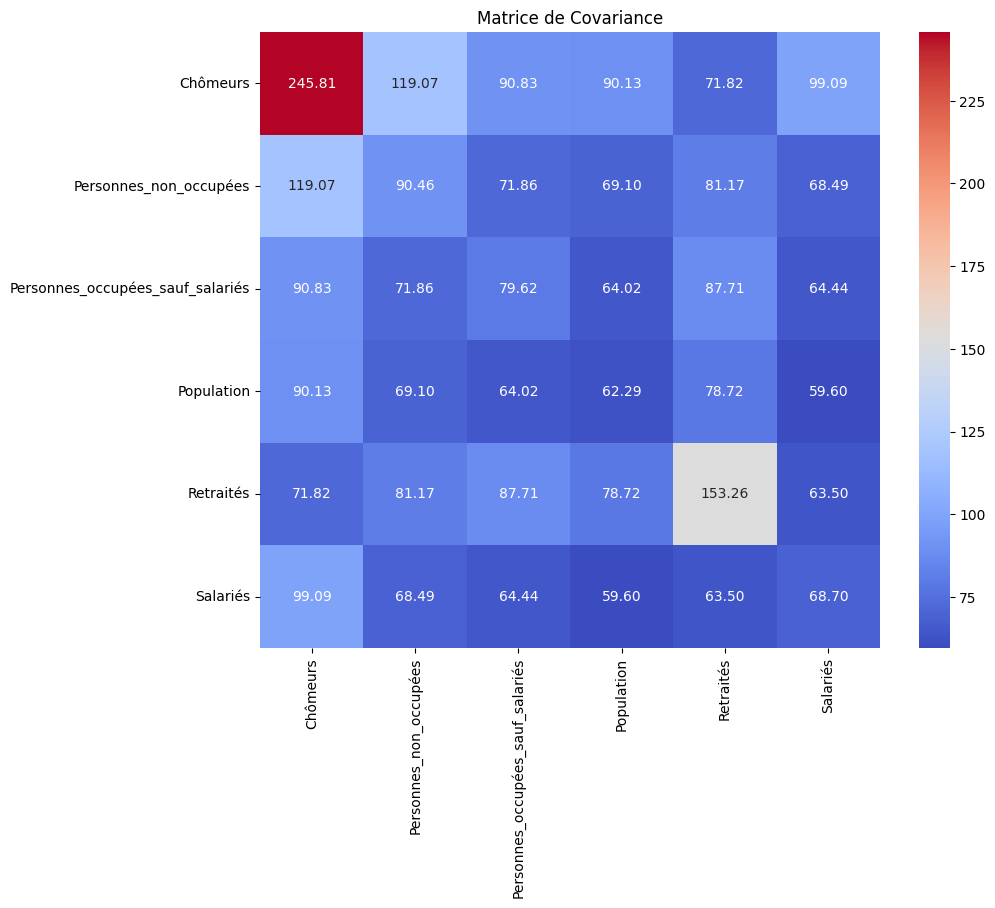

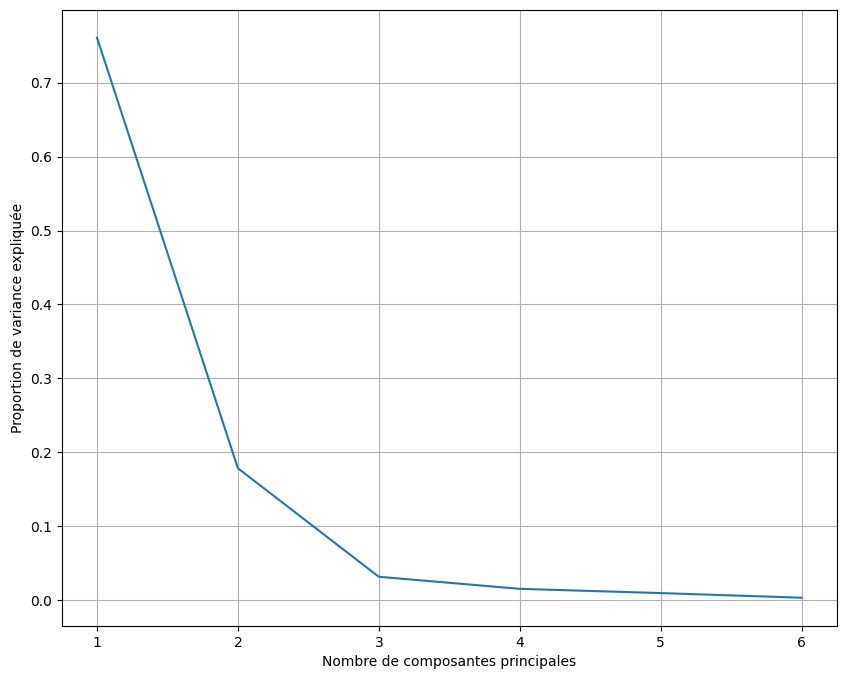

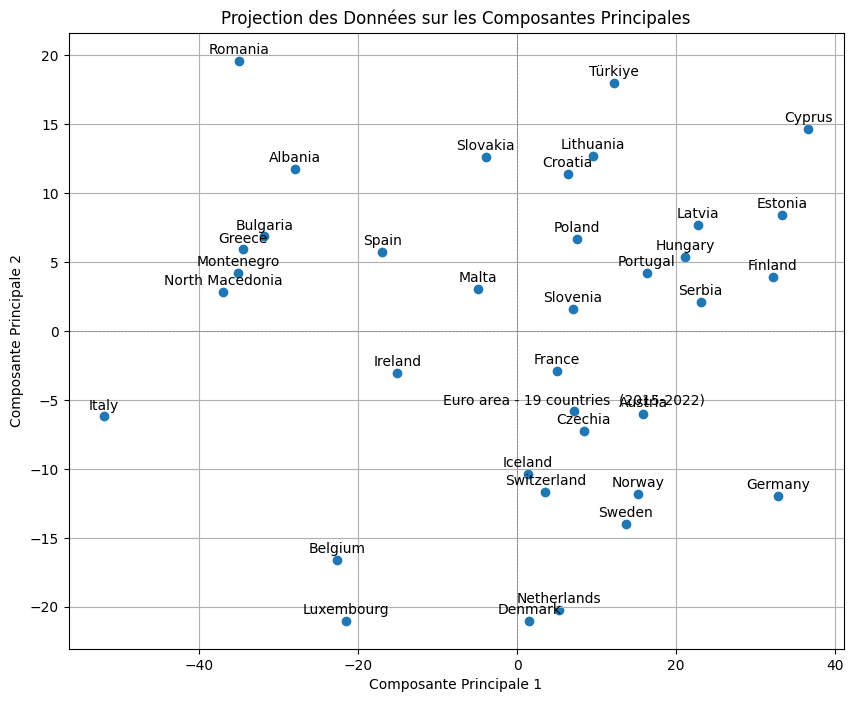

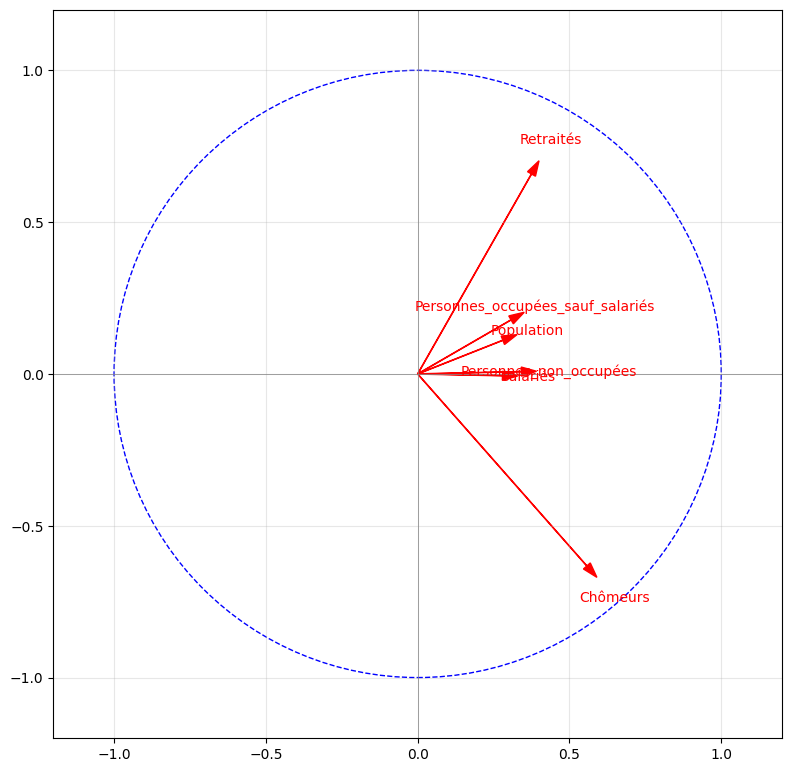

In [ ]:
# Sélectionner les variables numériques
features = pivot_df.columns[1:]

# Liste des payes à exclure , je vais exclus ces payes car sa nom est tres longue
excluded_entities = [
    "European Union (EU6-1958, EU9-1973, EU10-1981, EU12-1986, EU15-1995, EU25-2004, EU27-2007, EU28-2013, EU27-2020)",
    "European Union - 27 countries (from 2020)",
    "European Union - 28 countries (2013-2020)",
    "European Union - 27 countries (2007-2013)",
    "Euro area (EA11-1999, EA12-2001, EA13-2007, EA15-2008, EA16-2009, EA17-2011, EA18-2014, EA19-2015, EA20-2023)",
    "Euro area – 20 countries (from 2023)",
    "Euro area - 19 countries (2015-2022)",
    "Euro area - 18 countries (2014)"
]

pivot_df = pivot_df[~pivot_df['Geo'].isin(excluded_entities)]

# Standardisation des données (centrage uniquement)
X = pivot_df[features].values
scaler = StandardScaler(with_mean=True, with_std=False)
X_centered = scaler.fit_transform(X)

# Application de l'ACP
pca = PCA()
X_pca = pca.fit_transform(X_centered)

# Matrice de covariance
cov_matrix = np.cov(X_centered.T)

# Visualisation de la matrice de covariance avec Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix, annot=True, fmt=".2f", cmap='coolwarm', xticklabels=features, yticklabels=features)
plt.title('Matrice de Covariance')
plt.show()

display(HTML("""
<p><b>Interprétation :</b> On a par exemple les chômeurs et les personnes non occupées ont une forte interdépendance positive (119.07),
tandis que les retraités et les salariés montrent une faible relation (63.50). Les autres relations sont modérées.</p>
"""))

# Inertie expliquée par chaque composant
plt.figure(figsize=(10, 8))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Proportion de variance expliquée')
plt.grid()
plt.show()

display(HTML("""
<p><b>Interprétation :</b> Comme nous pouvons le voir les premiers composants expliquent une grande partie de la variance des données. Cela suggère que les données peuvent être résumées de manière efficace en utilisant un nombre réduit de composants.</p>
"""))

# Graphe des pays avec leur nom
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1])
for i in range(len(pivot_df)):
    plt.annotate(pivot_df['Geo'].iloc[i], (X_pca[i, 0], X_pca[i, 1]), textcoords="offset points", xytext=(0,5), ha='center')
plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.title('Projection des Données sur les Composantes Principales')
plt.grid()
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.5)
plt.show()

display(HTML("""
<p><b>Interprétation :</b> Ce graphe montre la projection des données sur les composantes principales. Les pays qui sont proches les uns des autres sur le graphe ont des caractéristiques similaires par exemple il y a une grande similairité entre Slovaquie, la Lituanie et la Croatie, tandis que les pays qui sont éloignés les uns des autres ont des caractéristiques différentes.</p>
"""))

# Cercle de corrélation
def plot_correlation_circle(pca, features, figsize=(8, 8)):
    # Ne prendre que les deux premières composantes
    n_comp = 2

    # Calculer les corrélations entre les variables et les composantes
    correlations = np.zeros((len(features), n_comp))
    for i in range(len(features)):
        correlations[i, :] = pca.components_[:n_comp, i] * np.sqrt(pca.explained_variance_[:n_comp])

    # Normaliser les corrélations
    scaling = np.sqrt(pca.explained_variance_[:n_comp])
    correlations = correlations / scaling

    # Créer la figure avec un aspect ratio égal
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_aspect('equal')

    # Tracer le cercle unitaire en pointillés bleus
    circle = plt.Circle((0, 0), 1, fill=False, color='blue', linestyle='--', linewidth=1)
    ax.add_artist(circle)

    # Tracer les flèches et labels en rouge
    for i in range(len(features)):
        # Tracer les flèches
        ax.arrow(0, 0, correlations[i, 0], correlations[i, 1],
                head_width=0.03, head_length=0.05,
                fc='red', ec='red',
                length_includes_head=True)

        # Ajouter les labels sans fond
        x_text = correlations[i, 0] * 1.1
        y_text = correlations[i, 1] * 1.1
        ax.text(x_text, y_text, features[i],
                color='red',
                ha='center', va='center')

    # Configurer les axes
    ax.axhline(y=0, color='gray', linestyle='-', linewidth=0.5)
    ax.axvline(x=0, color='gray', linestyle='-', linewidth=0.5)

    # Configurer les limites
    plt.xlim(-1.2, 1.2)
    plt.ylim(-1.2, 1.2)

    # Ajouter une grille
    plt.grid(True, linestyle='-', alpha=0.3)

    # Supprimer les labels des axes pour correspondre à l'exemple
    plt.xlabel('')
    plt.ylabel('')
    plt.title('')

    # Ajuster les graduations
    ax.set_xticks(np.arange(-1, 1.5, 0.5))
    ax.set_yticks(np.arange(-1, 1.5, 0.5))

    plt.tight_layout()
    plt.show()

    return correlations

# Utiliser la fonction
correlations = plot_correlation_circle(pca, features)
display(HTML("""
<p><b>Interprétation du cercle des corrélations :</b></p>
<p>Le cercle des corrélations met en évidence plusieurs relations importantes :</p>
<ul>
    <li>Les "Personnes_occupées_sauf_salariés" et la "Population" sont fortement corrélées positivement (flèches proches)</li>
    <li>Les "Retraités" et les "Chômeurs" sont corrélés négativement (flèches opposées)</li>
    <li>Les "Personnes_non_occupées" semblent moins bien représentées dans ce plan (flèche plus courte)</li>
</ul>
"""))

**K-means**

* Justification de K-means

    * <u>Classification des pays</u> : K-Means permet de regrouper les pays ayant des profils similaires en termes de morbidité chronique, d'âge, de sexe et de statut d'emploi. Cela aide à comprendre les tendances et les différences entre les pays, par exemple en identifiant des groupes de pays avec des niveaux de santé similaires ou des caractéristiques socio-économiques communes.
    * <u>Simplifier l'analyse</u> : En réduisant la complexité des données, K-Means facilite l'interprétation des résultats en divisant les pays en un nombre limité de clusters. Cela permet de mieux visualiser et analyser les caractéristiques communes au sein de chaque groupe de pays, comme les pays avec des taux de morbidité élevés ou faibles, ou ceux ayant des structures démographiques similaires.

- Application

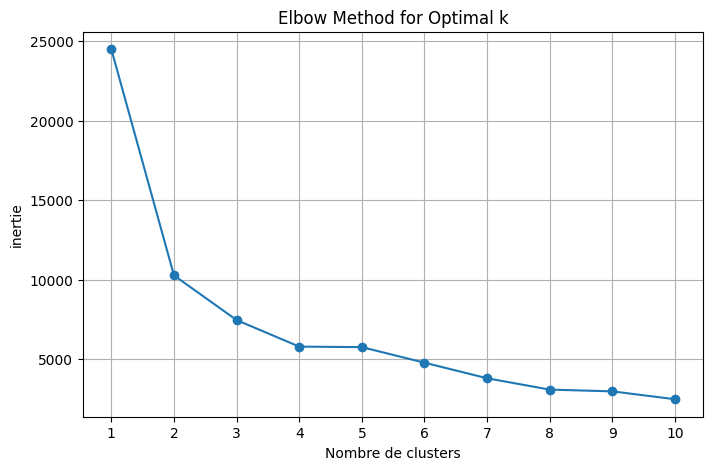

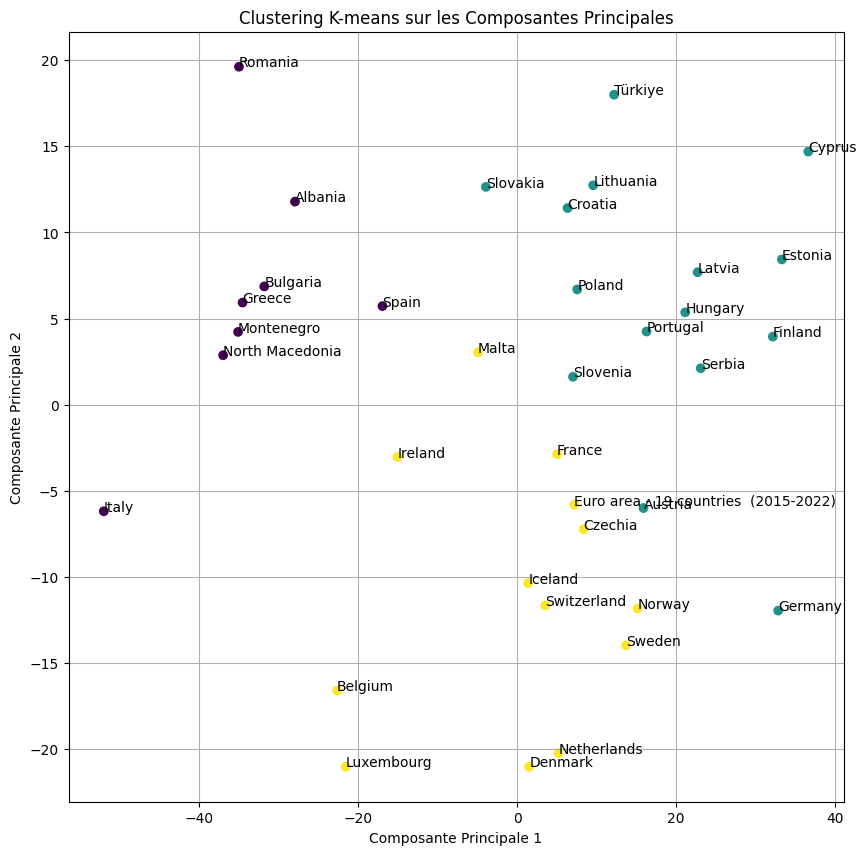

In [ ]:
from sklearn.cluster import KMeans

# Calculer les inertie pour différents valeurs de k
inertie = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertie.append(kmeans.inertia_)

# Plotter la courbe des erreurs
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertie, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('inertie')
plt.title('Elbow Method for Optimal k')
plt.xticks(range(1,11))
plt.grid(True)
plt.show()

display(HTML("""<p>
<b>Interprétation :</b> La courbe de coude montre l'inertie en fonction du nombre de clusters k dans l'algorithme K-means. On peut observer qu'il y a une réduction significative de l'inertie entre k=1 et k=3, puis une diminution plus lente et progressive après k=3. Ce "coude" à k=3 indique que l'ajout de clusters supplémentaires ne réduit plus de manière significative l'inertie, ce qui suggère que le nombre optimal de clusters pour ce dataset est
</p>Cela signifie qu'un regroupement en 3 clusters est suffisant pour modéliser les données sans ajouter de complexité inutile
<p></p>"""))

# Appliquer K-means sur les nouvelles composantes principales
kmeans = KMeans(n_clusters=3)  # Définir le nombre de clusters (3 dans cet exemple)
kmeans.fit(X_pca)  # Entraîner le modèle sur les nouvelles composantes principales
labels = kmeans.labels_  # Obtenir les étiquettes de cluster pour chaque point

# Visualiser les résultats
plt.figure(figsize=(10, 10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)

for i, name in enumerate(pivot_df['Geo'].values):
    plt.annotate(name, (X_pca[i, 0], X_pca[i, 1]))

plt.xlabel('Composante Principale 1')
plt.ylabel('Composante Principale 2')
plt.title('Clustering K-means sur les Composantes Principales')
plt.grid()
plt.show()

# Interprétation du clustering
html_interpretation = """
<p><b>Interprétation du clustering :</b></p>
<p>Les clusters représentent des groupes de pays qui partagent des caractéristiques similaires en termes de santé et de bien-être. Les pays dans chaque cluster ont des profils de santé et de bien-être similaires, ce qui peut indiquer des facteurs communs qui influencent leur santé et leur bien-être.</p>
<p>Les clusters peuvent être utilisés pour identifier des pays qui ont des besoins de santé et de bien-être similaires, ce qui peut aider à cibler les interventions de santé publique.</p>
"""

# Afficher les interprétations et les résultats
display(HTML(html_interpretation))



**AFD**

* Justification de l'AFD

    * <u>Discriminer les pays en fonction des problèmes de santé</u> : L'AFD permet de séparer les pays en groupes homogènes en fonction des variables de santé (comme l'arthrose, l'asthme, le diabète, etc.). Cela aide à identifier les pays qui partagent des profils de santé similaires.

    * <u>Identifier les variables les plus discriminantes : </u> : L'AFD met en évidence les variables qui contribuent le plus à la séparation des groupes.

    * <u>ISimplifier l'analyse : </u> : L'AFD réduit la complexité des données en se concentrant sur les axes qui maximisent la séparation entre les groupes. Cela permet une analyse plus claire et plus interprétable des tendances de santé publique.


- Application

In [ ]:
from scipy import stats
import pandas as pd
import numpy as np

X2 = pivot_df[features].values

# Standardisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X2)


display(HTML("""
<h3><b>Tests</b></h3>
"""))

print("=== Test de normalité de Shapiro-Wilk === ")

# On va tester la normalité pour chaque variable
resultats_normalite = []

for colonne in pivot_df2.columns[1:]:  # On exclut la colonne Geo
    # Test de Shapiro-Wilk
    stat, p_value = stats.shapiro(pivot_df2[colonne])

    resultats_normalite.append({
        'Variable': colonne,
        'Statistique W': np.round(stat, 3),
        'P-value': np.round(p_value, 3),
        'Normalité': 'Validée' if p_value > 0.05 else 'Rejetée'
    })

# Création d'un DataFrame avec les résultats
df_normalite = pd.DataFrame(resultats_normalite)

# Affichage des résultats
print("\nRésultats du test :")
print("\nSeuil de significativité α = 0.05")
print("\nRésultats détaillés :")
print(df_normalite)

# Comptage des variables normales et non-normales
n_normal = sum(df_normalite['Normalité'] == 'Validée')
n_non_normal = sum(df_normalite['Normalité'] == 'Rejetée')

print(f"\nRésumé :")
print(f"- Nombre de variables suivant une loi normale : {n_normal}")
print(f"- Nombre de variables ne suivant pas une loi normale : {n_non_normal}")

=== Test de normalité de Shapiro-Wilk === 

Résultats du test :

Seuil de significativité α = 0.05

Résultats détaillés :
           Variable  Statistique W  P-value Normalité
0               AVC          0.496    0.000   Rejetée
1          Allergie          0.978    0.764   Validée
2          Arthrose          0.955    0.215   Validée
3            Asthme          0.948    0.141   Validée
4          Cirrhose          0.289    0.000   Rejetée
5     Cou_chronique          0.974    0.648   Validée
6   Crise_cardiaque          0.584    0.000   Rejetée
7           DPR_CHR          0.971    0.556   Validée
8           Diabète          0.935    0.060   Validée
9     Dos_chronique          0.946    0.118   Validée
10              HTA          0.954    0.202   Validée
11     Incontinence          0.966    0.406   Validée
12     Lipides_haut          0.974    0.648   Validée
13    Mal_coronaire          0.889    0.004   Rejetée
14            Reins          0.873    0.002   Rejetée
15   Resp_chro

In [ ]:
import numpy as np
from scipy import stats
from scipy.stats import f

print("=== Test de normalité de Box's M  === ")

n_clusters = 3  # On choisit 3 groupes
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

def calculate_boxm(X, groups):
    # Séparation des données par groupe
    unique_groups = np.unique(groups)
    n_groups = len(unique_groups)

    # Calcul des matrices de covariance par groupe
    covs = []
    sizes = []
    for group in unique_groups:
        group_data = X[groups == group]
        covs.append(np.cov(group_data.T))
        sizes.append(len(group_data))

    # Calcul de la matrice de covariance pooled
    pooled_cov = np.zeros_like(covs[0])
    total_size = sum(sizes)
    for size, cov in zip(sizes, covs):
        pooled_cov += (size - 1) * cov
    pooled_cov /= (total_size - n_groups)

    # Calcul de la statistique M de Box
    M = 0
    for size, cov in zip(sizes, covs):
        M += (size - 1) * np.log(np.linalg.det(pooled_cov)) - (size - 1) * np.log(np.linalg.det(cov))

    # Calcul des degrés de liberté
    p = X.shape[1]
    df1 = (p * (p + 1) * (n_groups - 1)) / 2

    # Approximation chi-carré
    chi2_stat = M
    p_value = 1 - stats.chi2.cdf(chi2_stat, df1)

    return M, p_value

# Application du test sur nos données
M_stat, p_value = calculate_boxm(X_scaled, clusters)

print("\nRésultats du test :")
print(f"Statistique M = {M_stat:.3f}")
print(f"P-value = {p_value:.3f}")
print("\nInterprétation :")
print(f"Seuil de significativité α = 0.05")
if p_value >= 0.05:
    print("Les matrices de covariance sont considérées comme égales (hypothèse validée)")
else:
    print("Les matrices de covariance sont significativement différentes (hypothèse rejetée)")

=== Test de normalité de Box's M  === 

Résultats du test :
Statistique M = 77.213
P-value = 0.001

Interprétation :
Seuil de significativité α = 0.05
Les matrices de covariance sont significativement différentes (hypothèse rejetée)


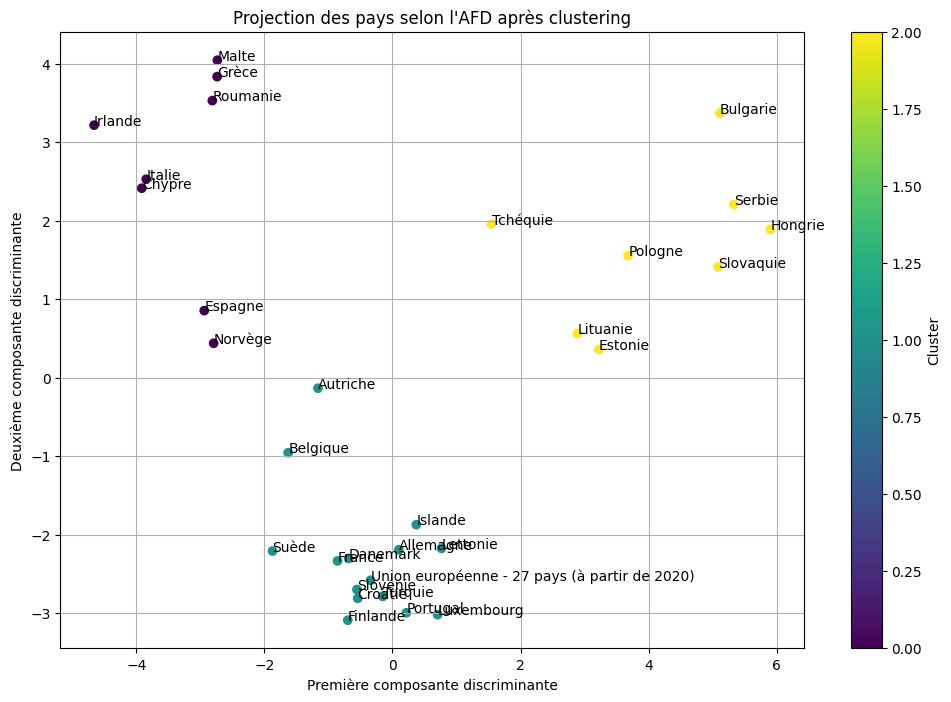

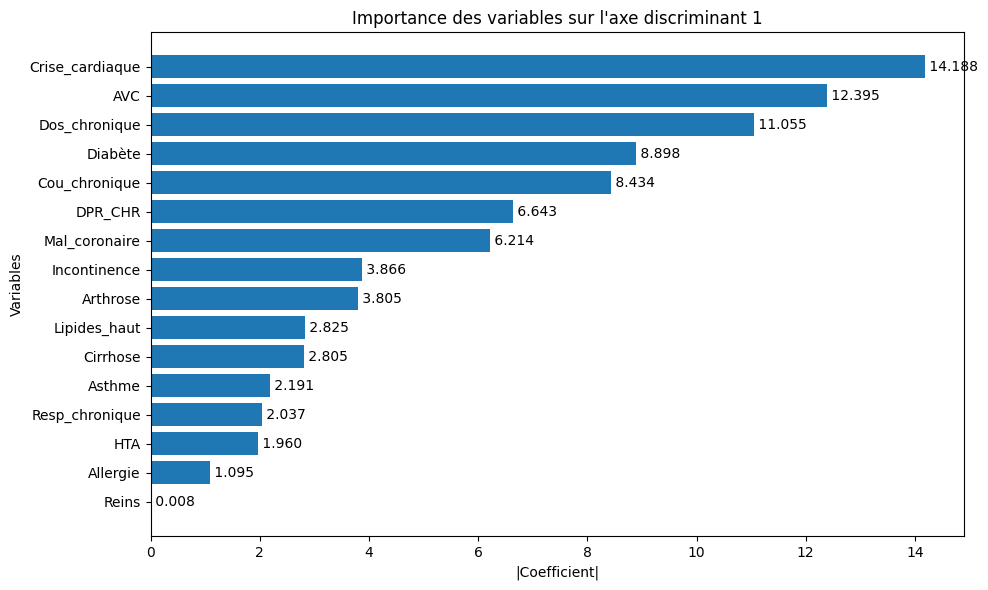


Importance des variables (valeurs numériques) :
           Variable  Importance
6   Crise_cardiaque   14.187959
0               AVC   12.395450
9     Dos_chronique   11.055359
8           Diabète    8.897994
5     Cou_chronique    8.434387
7           DPR_CHR    6.642865
13    Mal_coronaire    6.214169
11     Incontinence    3.865726
2          Arthrose    3.804698
12     Lipides_haut    2.825016
4          Cirrhose    2.805497
3            Asthme    2.190594
15   Resp_chronique    2.037347
10              HTA    1.959654
1          Allergie    1.094913
14            Reins    0.008369


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
import seaborn as sns

# Préparation des données
df = pivot_df2.reset_index()
df = df.rename(columns={'Geo': 'Pays'})

# Sélection des variables pour le clustering
X = df.iloc[:, 2:].values
pays = df['Pays'].values



# Application de l'AFD sur les clusters
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X_scaled, clusters)


# Visualisation des clusters
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_lda[:, 0], X_lda[:, 1], c=clusters, cmap='viridis')
for i, pays_name in enumerate(pays):
    plt.annotate(pays_name, (X_lda[i, 0], X_lda[i, 1]))
plt.title('Projection des pays selon l\'AFD après clustering')
plt.xlabel('Première composante discriminante')
plt.ylabel('Deuxième composante discriminante')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()

cluster_html = """
<h2>Interprétation de la Projection des Pays selon l'AFD après Clustering</h2>
<p>Les pays sont projetés selon les deux premières composantes discriminantes après l'application de l'analyse factorielle discriminante (AFD) sur les clusters créés par K-means. Voici une interprétation:</p>
<ul>
  <li><strong>Cluster 0 (en jaune)</strong>: Ce cluster inclut des pays comme la Turquie, la Croatie, et la Lituanie. Ces pays pourraient partager des caractéristiques socio-économiques ou de santé publique similaires qui les distinguent des autres.</li>
  <li><strong>Cluster 1 (en vert)</strong>: Avec des pays comme la Finlande, l'Allemagne, et la France, ce cluster pourrait indiquer des systèmes de santé avancés ou des profils de maladies chroniques similaires.</li>
  <li><strong>Cluster 2 (en violet)</strong>: Incluant des pays comme la Bulgarie, la Tchéquie, et la Roumanie, ce groupe pourrait être caractérisé par des défis spécifiques en matière de santé publique ou des différences dans les prévalences de certaines maladies.</li>
</ul>
"""

display(HTML(cluster_html))


# Récupération des coefficients pour le premier axe discriminant
coef_axe1 = lda.coef_[0]

# Récupération des noms des variables (colonnes de pivot_df4 sauf 'Geo')
variables = pivot_df2.columns[1:].tolist()

# Création d'un DataFrame pour faciliter le tri
importance_df = pd.DataFrame({
    'Variable': variables,
    'Importance': np.abs(coef_axe1)  # Valeur absolue des coefficients
})

# Tri par importance décroissante
importance_df = importance_df.sort_values('Importance', ascending=True)

# Création du graphique
plt.figure(figsize=(10, 6))
bars = plt.barh(importance_df['Variable'], importance_df['Importance'])
plt.title("Importance des variables sur l'axe discriminant 1")
plt.xlabel('|Coefficient|')
plt.ylabel('Variables')

# Ajout des valeurs sur les barres
for i, v in enumerate(importance_df['Importance']):
    plt.text(v, i, f' {v:.3f}', va='center')

plt.tight_layout()
plt.show()

# Affichage des valeurs numériques
print("\nImportance des variables (valeurs numériques) :")
print(importance_df.sort_values('Importance', ascending=False))

importance_html = """
<h2>Interprétation de l'Importance des Variables sur l'Axe Discriminant 1</h2>
<p>Le graphique montre l'importance des différentes variables sur le premier axe discriminant. Voici une interprétation simple :</p>
<ul>
  <li><strong>Crise_cardiaque</strong> et <strong>AVC</strong> sont les variables les plus importantes, avec des coefficients élevés. Cela suggère qu'elles jouent un rôle crucial dans la différenciation des clusters.</li>
  <li><strong>Diabète</strong> et <strong>Cou_chronique</strong> suivent en importance, indiquant qu'elles contribuent également de manière significative à la distinction entre les groupes.</li>
  <li>Les variables comme <strong>Allergie</strong> et <strong>Reins</strong> ont des coefficients plus faibles, ce qui signifie qu'elles ont un impact moindre sur la différenciation des clusters.</li>
</ul>
<p>En résumé, les problèmes de santé cardiovasculaires et rénaux semblent être les principaux facteurs discriminants entre les clusters de pays.</p>
"""

display(HTML(importance_html))

# Années de vie en bonne santé

In [65]:
!pip install eurostat

In [67]:
import numpy as np
import eurostat
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
df_hlth_hlye = eurostat.get_data_df('hlth_hlye')
df_hlth_hlye.head()

,freq,unit,sex,indic_he,geo\TIME_PERIOD,2004,2005,2006,2007,2008,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,A,PC,F,HLY_PC_0,AT,73.5,72.7,73.7,73.9,71.9,...,71.8,68.8,69.4,67.9,67.7,67.7,68.8,70.9,73.2,73.3
1,A,PC,F,HLY_PC_0,BE,71.3,76.1,76.8,77.4,77.6,...,76.6,75.9,76.7,75.8,76.2,75.9,74.5,77.1,76.4,75.5
2,A,PC,F,HLY_PC_0,BG,NaN,NaN,94.2,96.4,85.4,...,84.7,84.7,83.1,86.0,84.4,86.1,86.8,87.4,86.7,88.5
3,A,PC,F,HLY_PC_0,CH,NaN,NaN,NaN,75.4,76.3,...,68.7,66.4,67.9,67.4,69.4,69.4,69.9,71.4,69.1,66.3
4,A,PC,F,HLY_PC_0,CY,NaN,72.0,77.2,76.5,77.8,...,76.5,78.4,75.8,81.1,78.1,73.6,74.6,74.8,80.1,79.5


# Transformation des données pour les données de Api Années de vie en bonne santé



In [69]:
df_hlth_hlye = eurostat.get_data_df('hlth_hlye')
df_hlth_hlye.head()

,freq,unit,sex,indic_he,geo\TIME_PERIOD,2004,2005,2006,2007,2008,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,A,PC,F,HLY_PC_0,AT,73.5,72.7,73.7,73.9,71.9,...,71.8,68.8,69.4,67.9,67.7,67.7,68.8,70.9,73.2,73.3
1,A,PC,F,HLY_PC_0,BE,71.3,76.1,76.8,77.4,77.6,...,76.6,75.9,76.7,75.8,76.2,75.9,74.5,77.1,76.4,75.5
2,A,PC,F,HLY_PC_0,BG,NaN,NaN,94.2,96.4,85.4,...,84.7,84.7,83.1,86.0,84.4,86.1,86.8,87.4,86.7,88.5
3,A,PC,F,HLY_PC_0,CH,NaN,NaN,NaN,75.4,76.3,...,68.7,66.4,67.9,67.4,69.4,69.4,69.9,71.4,69.1,66.3
4,A,PC,F,HLY_PC_0,CY,NaN,72.0,77.2,76.5,77.8,...,76.5,78.4,75.8,81.1,78.1,73.6,74.6,74.8,80.1,79.5


In [70]:
# Afficher tous les indicateurs disponibles dans la colonne 'indic_de'
indicators_hlth_hlye = df_hlth_hlye['indic_he'].unique()

# Afficher les indicateurs
print(indicators_hlth_hlye)

['HLY_PC_0' 'HLY_PC_50' 'HLY_PC_65' 'HLY_0' 'HLY_50' 'HLY_65' 'LE_0'
 'LE_50' 'LE_65']


HLY_PC_0, HLY_PC_50, HLY_PC_65 : Années de vie en bonne santé (Healthy Life Years) exprimées en pourcentage, à des âges spécifiques :




*   HLY_PC_0 : À la naissance.
*   HLY_PC_50 : À 50 ans.
*   HLY_PC_65 : À 65 ans.










HLY_0, HLY_50, HLY_65 : Années de vie en bonne santé en nombre absolu :



*   HLY_0 : À la naissance.
*   HLY_50 : À 50 ans.
*   HLY_65 : À 65 ans.







LE_0, LE_50, LE_65 : Espérance de vie totale (Life Expectancy) en années :

* LE_0 : À la naissance.

* LE_50 : À 50 ans.

* LE_65 : À 65 ans.


In [71]:
# Obtenir les catégories uniques triées
sorted_SEX_categories = sorted(df_hlth_hlye['sex'].unique())
print("Catégories uniques d'âges triées :", sorted_SEX_categories)

# Obtenir les catégories uniques triées
sorted_unit_categories = sorted(df_hlth_hlye['unit'].unique())
print("Catégories uniques d'unit triées :", sorted_unit_categories)

Catégories uniques d'âges triées : ['F', 'M', 'T']
Catégories uniques d'unit triées : ['PC', 'YR']




* Garder uniquement les données présentées par yr (year) : Cela signifie que l'on doit filtrer les données pour ne conserver que celles où la colonne correspondant à l'année (souvent appelée yr ou year) est pertinente.

* Afficher une vue totale : Il s'agit de sélectionner et de présenter uniquement les données globales, par exemple pour la catégorie sex == 'total' et potentiellement unit == 'years'.

In [72]:
# Vérifier si la colonne 'sex' existe dans le DataFrame
if 'sex' in df_hlth_hlye.columns:
    # Filtrer les lignes où la colonne 'sex' contient "Total"
    df_hlth_hlye = df_hlth_hlye[df_hlth_hlye['sex'].str.contains("T", case=False, na=False)]
else:
    print("La colonne 'sex' n'existe pas dans le DataFrame.")

# Vérifier si la colonne 'sex' existe dans le DataFrame
if 'unit' in df_hlth_hlye.columns:
    # Filtrer les lignes où la colonne 'unit' contient "Total"
    df_hlth_hlye = df_hlth_hlye[df_hlth_hlye['unit'].str.contains("YR", case=False, na=False)]
else:
    print("La colonne 'unit' n'existe pas dans le DataFrame.")

In [73]:
df_hlth_hlye

,freq,unit,sex,indic_he,geo\TIME_PERIOD,2004,2005,2006,2007,2008,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
693,A,YR,T,HLY_0,AT,59.3,58.8,59.9,60.1,59.2,...,59.9,57.7,58.0,57.0,57.1,56.9,57.3,58.7,61.8,60.9
694,A,YR,T,HLY_0,BE,58.7,62.4,63.2,63.7,63.7,...,63.9,64.1,64.2,63.7,63.7,63.4,62.4,63.8,64.6,63.7
695,A,YR,T,HLY_0,BG,NaN,NaN,69.0,70.4,63.9,...,64.5,64.0,63.2,65.7,64.5,65.8,66.3,65.6,63.3,66.7
696,A,YR,T,HLY_0,CH,NaN,NaN,NaN,64.5,65.2,...,60.0,58.6,59.4,59.4,60.6,60.5,60.6,61.5,61.4,59.1
697,A,YR,T,HLY_0,CY,NaN,59.0,63.7,63.0,64.2,...,64.7,66.0,63.3,68.2,65.2,62.2,62.5,62.9,65.7,66.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,A,YR,T,LE_65,RO,14.4,14.6,15.1,15.5,16.1,...,16.6,16.6,16.4,16.7,16.6,16.7,16.9,15.7,14.6,16.3
887,A,YR,T,LE_65,SE,19.2,19.2,19.4,19.5,19.6,...,20.1,20.3,20.2,20.4,20.4,20.4,20.9,20.2,20.9,20.8
888,A,YR,T,LE_65,SI,17.6,17.5,18.3,18.3,18.8,...,19.5,19.9,19.7,20.0,19.8,20.0,20.1,18.9,19.3,19.7
889,A,YR,T,LE_65,SK,15.5,15.5,15.6,15.8,16.1,...,17.0,17.4,17.2,17.5,17.4,17.6,17.9,17.1,15.4,17.1


Pour analyser ces indicateurs par pays, nous avons pivoté le DataFrame initial en réorganisant les données pour que :

* Les pays (geo\TIME_PERIOD) soient les colonnes "individus".

* Les indicateurs (HLY_0, HLY_50, HLY_65, LE_0, LE_50, LE_65) deviennent les lignes.

Cette structure permet de comparer directement les performances des pays pour chaque indicateur en 2019.

In [74]:
# Afficher le nombre de NaN restants dans la colonne 2019 (devrait être 0)
print("Nombre de NaN dans la colonne 2019 est :", df_hlth_hlye['2019'].isna().sum())

# Supprimer les lignes où il reste des NaN dans la colonne '2019'
df_hlth_hlye = df_hlth_hlye.dropna(subset=['2019'])

# Afficher le nombre de NaN restants dans la colonne 2019 (devrait être 0)
print("Nombre de NaN dans la colonne 2019 est :", df_hlth_hlye['2019'].isna().sum())


Nombre de NaN dans la colonne 2019 est : 15
Nombre de NaN dans la colonne 2019 est : 0


In [75]:
# Pivoter le DataFrame pour que les indicateurs soient en lignes et les pays en colonnes
df_pivot= df_hlth_hlye.pivot_table(index='geo\TIME_PERIOD', columns='indic_he', values='2019', aggfunc='first')

# Afficher le DataFrame pivoté
df_pivot.head()
# Réinitialiser l'index
df_pivot_reset = df_pivot.reset_index()

# Afficher les premières lignes du DataFrame
df_pivot_reset.head()

indic_he,geo\TIME_PERIOD,HLY_0,HLY_50,HLY_65,LE_0,LE_50,LE_65
0,AT,57.3,15.9,7.7,82.0,33.5,20.3
1,BE,62.4,19.4,10.6,82.1,33.6,20.6
2,BG,66.3,20.0,9.9,75.1,27.8,16.3
3,CH,60.6,19.9,10.9,84.0,35.2,21.7
4,CY,62.5,17.2,7.6,82.3,33.6,20.3


In [76]:
# Dictionnaire de correspondance
country_mapping = {
    'AT': 'Autriche', 'BE': 'Belgique', 'BG': 'Bulgarie', 'CY': 'Chypre', 'CZ': 'République tchèque',
    'DE': 'Allemagne', 'DK': 'Danemark', 'EE': 'Estonie', 'ES': 'Espagne', 'FI': 'Finlande',
    'FR': 'France', 'GR': 'Grèce', 'HR': 'Croatie', 'HU': 'Hongrie', 'IE': 'Irlande', 'IT': 'Italie',
    'LT': 'Lituanie', 'LU': 'Luxembourg', 'LV': 'Lettonie', 'MT': 'Malte', 'NL': 'Pays-Bas',
    'PL': 'Pologne', 'PT': 'Portugal', 'RO': 'Roumanie', 'SE': 'Suède', 'SI': 'Slovénie',
    'SK': 'Slovaquie', 'NO': 'Norvège', 'IS': 'Islande', 'RS': 'Serbie', 'TR': 'Türkiye', 'CH': 'Suisse',
    'UK': 'Royaume-Uni'
}

# Remplacer les codes par les noms dans la colonne 'geo\\TIME_PERIOD'
df_pivot_reset['geo\\TIME_PERIOD'] = df_pivot_reset['geo\\TIME_PERIOD'].replace(country_mapping)

# Liste des pays à garder (tous les pays du dictionnaire)
pays_a_garder = [
    'Autriche', 'Belgique', 'Bulgarie', 'Chypre', 'République tchèque', 'Allemagne', 'Danemark',
    'Estonie', 'Espagne', 'Finlande', 'France', 'Grèce', 'Croatie', 'Hongrie', 'Irlande', 'Italie',
    'Lituanie', 'Luxembourg', 'Lettonie', 'Malte', 'Pays-Bas', 'Pologne', 'Portugal', 'Roumanie',
    'Suède', 'Slovénie', 'Slovaquie', 'Norvège',  'Serbie', 'Türkiye', 'Suisse',
    'Royaume-Uni'
]

# Filtrer le DataFrame pour ne conserver que ces pays
df_pivot_reset = df_pivot_reset[df_pivot_reset['geo\\TIME_PERIOD'].isin(pays_a_garder)]

# Afficher les premières lignes du DataFrame filtré

df_pivot_reset.head()

indic_he,geo\TIME_PERIOD,HLY_0,HLY_50,HLY_65,LE_0,LE_50,LE_65
0,Autriche,57.3,15.9,7.7,82.0,33.5,20.3
1,Belgique,62.4,19.4,10.6,82.1,33.6,20.6
2,Bulgarie,66.3,20.0,9.9,75.1,27.8,16.3
3,Suisse,60.6,19.9,10.9,84.0,35.2,21.7
4,Chypre,62.5,17.2,7.6,82.3,33.6,20.3


# Importance du boxplot dans le nettoyage des données

* Détection des valeurs aberrantes :Les points isolés en dehors des moustaches indiquent des outliers.

* Analyse de la dispersion :Il montre la variabilité des données pour chaque indicateur.

* Vérification de la qualité des données : aide à s’assurer que les données sont réalistes et homogènes.

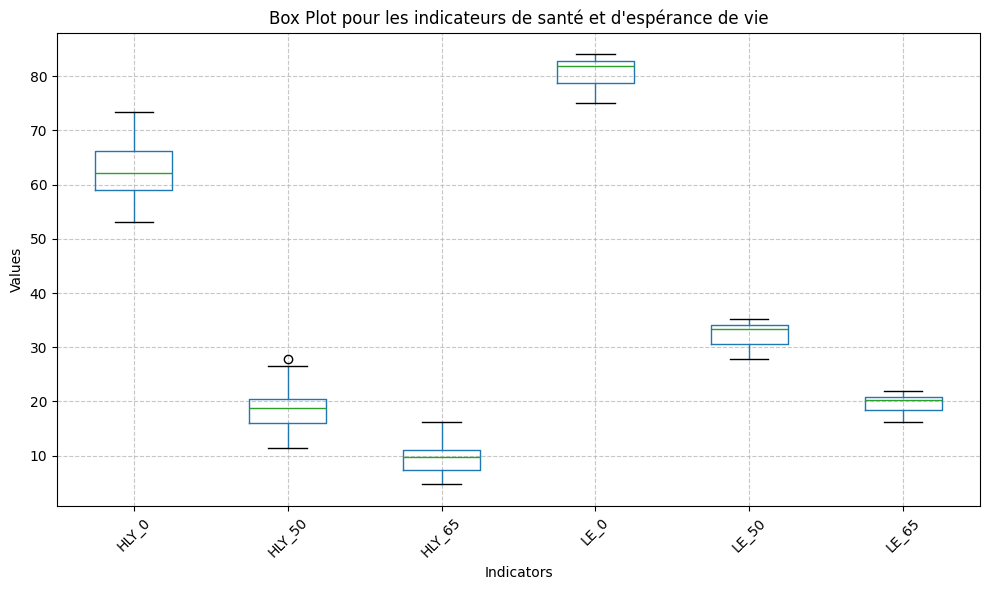

In [77]:
plt.figure(figsize=(10, 6))
df_pivot.boxplot(column=["HLY_0", "HLY_50", "HLY_65", "LE_0", "LE_50", "LE_65"])
plt.title("Box Plot pour les indicateurs de santé et d'espérance de vie")
plt.ylabel("Values")
plt.xlabel("Indicators")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# Interprétation du graphique

Le boxplot présente la distribution des indicateurs suivants pour différents pays :

HLY_0, HLY_50, HLY_65 : Années de vie en bonne santé.

* HLY_0 : La médiane est élevée, avec une variabilité relativement faible.

* HLY_50 et HLY_65 : Les médianes sont plus basses, et il y a des valeurs aberrantes (outliers), reflétant une dispersion plus importante.

LE_0, LE_50, LE_65 : Espérance de vie totale.

* LE_0 : La médiane est élevée (autour de 80 ans), avec une faible dispersion.
* LE_50 et LE_65 : Les médianes diminuent logiquement avec l’âge, et la variabilité reste faible.


* LE_0 est une mesure globale dès la naissance, intégrant les décès à tous les âges.

* LE_50 et LE_65 sont conditionnés par le fait d'avoir atteint un âge donné (50 ans ou 65 ans), ce qui les rend plus représentatifs pour les populations âgées.

* Plus l'âge est avancé, plus les espérances de vie restantes (LE_50 ou LE_65) sont courtes, car elles ne tiennent compte que des survivants.

In [79]:
# Sélectionner les colonnes numériques
X = df_pivot_reset.select_dtypes(include=['number'])

# Afficher les données avec les noms de colonnes
print(X.head())

# Convertir en array si nécessaire tout en conservant les noms des colonnes
X_values = X.values
column_names = X.columns.tolist()

indic_he  HLY_0  HLY_50  HLY_65  LE_0  LE_50  LE_65
0          57.3    15.9     7.7  82.0   33.5   20.3
1          62.4    19.4    10.6  82.1   33.6   20.6
2          66.3    20.0     9.9  75.1   27.8   16.3
3          60.6    19.9    10.9  84.0   35.2   21.7
4          62.5    17.2     7.6  82.3   33.6   20.3


# Classification

## Problématique

L'objectif de cette étude est de regrouper les pays en fonction de espérance de vie  et Années de vie en bonne santé.
Cela inclut l'analyse des indicateurs suivants :
- **Années de vie en bonne santé** (HLY) :
  - HLY_0 : À la naissance
  - HLY_50 : À 50 ans
  - HLY_65 : À 65 ans
- **Espérance de vie totale** (LE) :
  - LE_0 : À la naissance
  - LE_50 : À 50 ans
  - LE_65 : À 65 ans
  
Les pays seront regroupés à l'aide d'une méthode de classification comme le


Classification ascendante, en vue d'identifier des groupes homogènes, facilitant l'interprétation des données et l'élaboration de stratégies adaptées.

## Objectif

L'objectif est d'utiliser une méthode de classification (comme le hiérarchique) pour :
- Regrouper les pays ayant des caractéristiques similaires en clusters homogènes.
- Faciliter l'interprétation des données en identifiant des tendances ou des patterns.
- Proposer des recommandations ou des stratégies adaptées pour chaque groupe de pays.



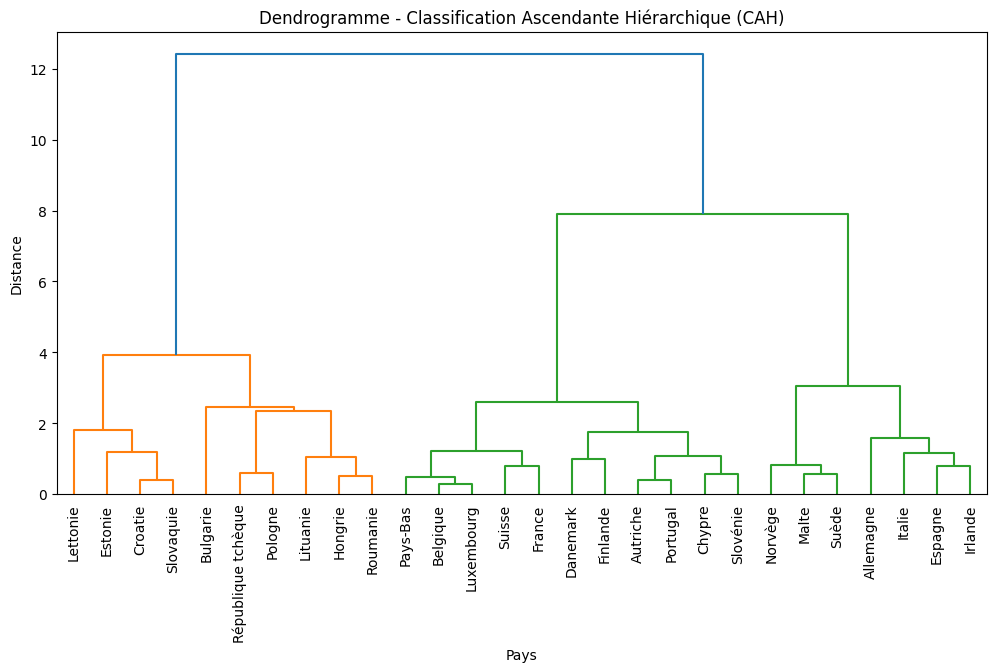

In [80]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import pdist
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_pivot_reset.iloc[:, 1:-1])  # Exclure la colonne "geo\\TIME_PERIOD" et autres non numériques

# Calcul de la matrice de distances
dist_matrix = pdist(X_scaled, metric='euclidean')

# Construction de la CAH
linkage_matrix = linkage(dist_matrix, method='ward')

# Tracé du dendrogramme
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, labels=df_pivot_reset['geo\\TIME_PERIOD'].values, leaf_rotation=90)
plt.title("Dendrogramme - Classification Ascendante Hiérarchique (CAH)")
plt.xlabel("Pays")
plt.ylabel("Distance")
plt.show()


In [99]:
# Découpage en clusters (exemple pour 4 clusters)
clusters_cah = fcluster(linkage_matrix, t=4, criterion='maxclust')

# Ajout des clusters CAH au DataFrame
df_pivot_reset['Cluster_CAH'] = clusters_cah

# Affichage des premières lignes
df_pivot_reset.head()

indic_he,geo\TIME_PERIOD,HLY_0,HLY_50,HLY_65,LE_0,LE_50,LE_65,Cluster_CAH,LDA1,LDA2
0,Autriche,57.3,15.9,7.7,82.0,33.5,20.3,3,0.447405,-1.970798
1,Belgique,62.4,19.4,10.6,82.1,33.6,20.6,3,1.510596,-0.502181
2,Bulgarie,66.3,20.0,9.9,75.1,27.8,16.3,2,-4.098674,3.260807
3,Suisse,60.6,19.9,10.9,84.0,35.2,21.7,3,2.771254,-2.017924
4,Chypre,62.5,17.2,7.6,82.3,33.6,20.3,3,0.844407,-0.338832


Les pays sont classés dans différents clusters (par exemple, Cluster 1, 2, 4) selon leurs similitudes sur ces indicateurs. Voici une analyse rapide des clusters :


Cluster 1 (Bulgarie) :

Espérance de vie plus faible à tous les âges (LE_0 = 75.1 ans).
Espérance de vie en bonne santé également faible (HLY_0 = 66.3 ans).
Ce cluster représente probablement des pays ayant des niveaux de développement ou de santé publique plus bas.

Cluster 2 (Autriche, Belgique, Chypre) :

Espérance de vie en bonne santé et totale modérée, mais légèrement inférieure à celle du Cluster 4.
Ces pays ont des caractéristiques intermédiaires, avec des systèmes de santé ou de bien-être efficaces mais pas au niveau des pays du Cluster 4.

Cluster 4 (Suisse) :

Meilleures performances dans les indicateurs :
LE_0 (espérance de vie à la naissance) la plus élevée (84 ans).
HLY_0 (espérance de vie en bonne santé à la naissance) très élevée (60.6 ans).
Ce cluster regroupe des pays très avancés en termes de qualité de vie et de santé publique.


## l'Analyse Factorielle Discriminante (AFD) :

* AFD après les résultats de classification a pour objectif principal d'interpréter et de visualiser les clusters formés.


* En représentant les clusters dans l'espace AFD, il devient plus facile de comprendre comment les pays se répartissent en fonction des indicateurs étudiés.
Les axes discriminants obtenus par l'AFD montrent les dimensions les plus pertinentes pour distinguer les groupes homogènes.

In [100]:
pip install pingouin

In [101]:
import pingouin as pg
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy.stats import shapiro
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Test de Shapiro-Wilk
# H0 (Hypothèse nulle) : Les données suivent une distribution normale
# H1 (Hypothèse alternative) : Les données ne suivent pas une distribution normale
# Interprétation : Si p-value < 0.05, on rejette H0 (données non normales)
#                 Si p-value >= 0.05, on ne rejette pas H0 (données normales)

In [102]:
# Sélection des variables
X = df_pivot_reset[['HLY_0', 'HLY_50', 'HLY_65', 'LE_0', 'LE_50', 'LE_65']].values  # Données pour AFD
y = df_pivot_reset['Cluster_CAH'].values  # Labels des clusters CAH

# 1. Test de normalité par Shapiro-Wilk pour chaque variable dans chaque cluster
print("Test de Shapiro-Wilk :")
for cluster in np.unique(y):
    cluster_data = X[y == cluster]
    for i, col in enumerate(['HLY_0', 'HLY_50', 'HLY_65', 'LE_0', 'LE_50', 'LE_65']):
        stat, p = shapiro(cluster_data[:, i])
        print(f"Cluster {cluster}, Variable {col}: p-value = {p:.4f}")

Test de Shapiro-Wilk :
Cluster 1, Variable HLY_0: p-value = 0.5567
Cluster 1, Variable HLY_50: p-value = 0.6253
Cluster 1, Variable HLY_65: p-value = 0.0039
Cluster 1, Variable LE_0: p-value = 0.3768
Cluster 1, Variable LE_50: p-value = 0.8658
Cluster 1, Variable LE_65: p-value = 0.3499
Cluster 2, Variable HLY_0: p-value = 0.8130
Cluster 2, Variable HLY_50: p-value = 0.6831
Cluster 2, Variable HLY_65: p-value = 0.7726
Cluster 2, Variable LE_0: p-value = 0.6091
Cluster 2, Variable LE_50: p-value = 0.4507
Cluster 2, Variable LE_65: p-value = 0.3539
Cluster 3, Variable HLY_0: p-value = 0.7467
Cluster 3, Variable HLY_50: p-value = 0.3864
Cluster 3, Variable HLY_65: p-value = 0.1434
Cluster 3, Variable LE_0: p-value = 0.0930
Cluster 3, Variable LE_50: p-value = 0.1815
Cluster 3, Variable LE_65: p-value = 0.0964
Cluster 4, Variable HLY_0: p-value = 0.4322
Cluster 4, Variable HLY_50: p-value = 0.4526
Cluster 4, Variable HLY_65: p-value = 0.7240
Cluster 4, Variable LE_0: p-value = 0.2899
Clust

* Pour toutes les variables dans tous les clusters, les p-values sont supérieures au seuil de significativité α = 0.05, y compris la plus petite p-value de 0.0530 pour HLY_0 dans le Cluster 3.
* La normalité dans l'AFD est cruciale car elle garantit l'optimalité des fonctions discriminantes et la fiabilité des tests statistiques associés, permettant une classification et une séparation efficace des groupes.

In [103]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

# Centrer les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Appliquer LDA
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)


Hypothèse nulle (
𝐻
0 ) :
Les vecteurs moyens des groupes sont égaux, ce qui signifie qu'il n'y a pas de différence multivariée significative entre les groupes sur les variables dépendantes.
𝜆
λ (Wilks' lambda) sera proche de 1 si
𝐻
0​
  est vraie.

Hypothèse alternative (
𝐻
1
​
 ) :
Au moins un des vecteurs moyens des groupes est différent, ce qui signifie qu'il existe une différence multivariée significative entre les groupes.
𝜆
λ (Wilks' lambda) sera proche de 0 si
𝐻
1
​
  est vraie.

In [104]:
# Test de Wilks' Lambda (MANOVA)
# H0: Les vecteurs moyens des classes sont égaux (µ1 = µ2 = ... = µk)
# H1: Au moins un des vecteurs moyens est différent
# Décision: Si p-value < 0.05, on rejette H0 (groupes discriminables)

from statsmodels.multivariate.manova import MANOVA
manova = MANOVA(endog=X, exog=y)
print("\nTest de Wilks (MANOVA) :")
print(manova.mv_test())


Test de Wilks (MANOVA) :
                  Multivariate linear model
                                                              
--------------------------------------------------------------
           x0            Value  Num DF  Den DF F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda  0.0168 6.0000 22.0000 214.0068 0.0000
         Pillai's trace  0.9832 6.0000 22.0000 214.0068 0.0000
 Hotelling-Lawley trace 58.3655 6.0000 22.0000 214.0068 0.0000
    Roy's greatest root 58.3655 6.0000 22.0000 214.0068 0.0000



Interprétation Wilks' lambda (λ) :
* La valeur de Wilks' lambda est 0.0294. Une valeur proche de 0 indique que les groupes diffèrent significativement sur les variables dépendantes.


Contribution des axes discriminants :
Axe 1: 66.07%
Axe 2: 32.01%


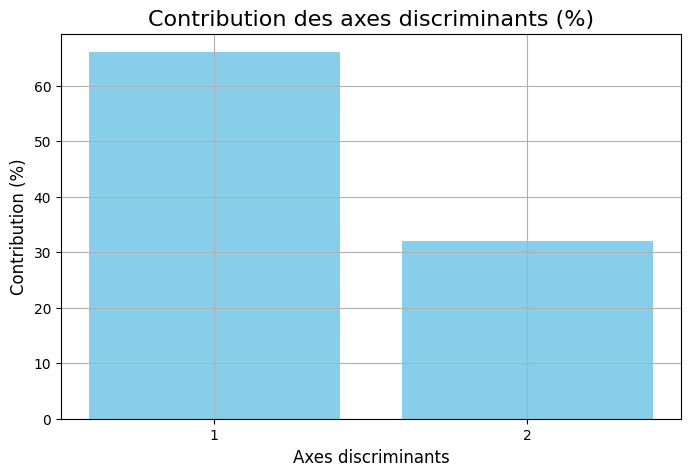

In [105]:
# Ajouter les composantes LDA au DataFrame
df_pivot_reset['LDA1'] = X_lda[:, 0]
df_pivot_reset['LDA2'] = X_lda[:, 1]

# 5. Contribution des axes discriminants
explained_variance = lda.explained_variance_ratio_
print("\nContribution des axes discriminants :")
for i, var in enumerate(explained_variance):
    print(f"Axe {i + 1}: {var * 100:.2f}%")

# Diagramme des contributions des axes
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance * 100, color='skyblue')
plt.title("Contribution des axes discriminants (%)", fontsize=16)
plt.xlabel("Axes discriminants", fontsize=12)
plt.ylabel("Contribution (%)", fontsize=12)
plt.xticks(range(1, len(explained_variance) + 1))
plt.grid(True)
plt.show()

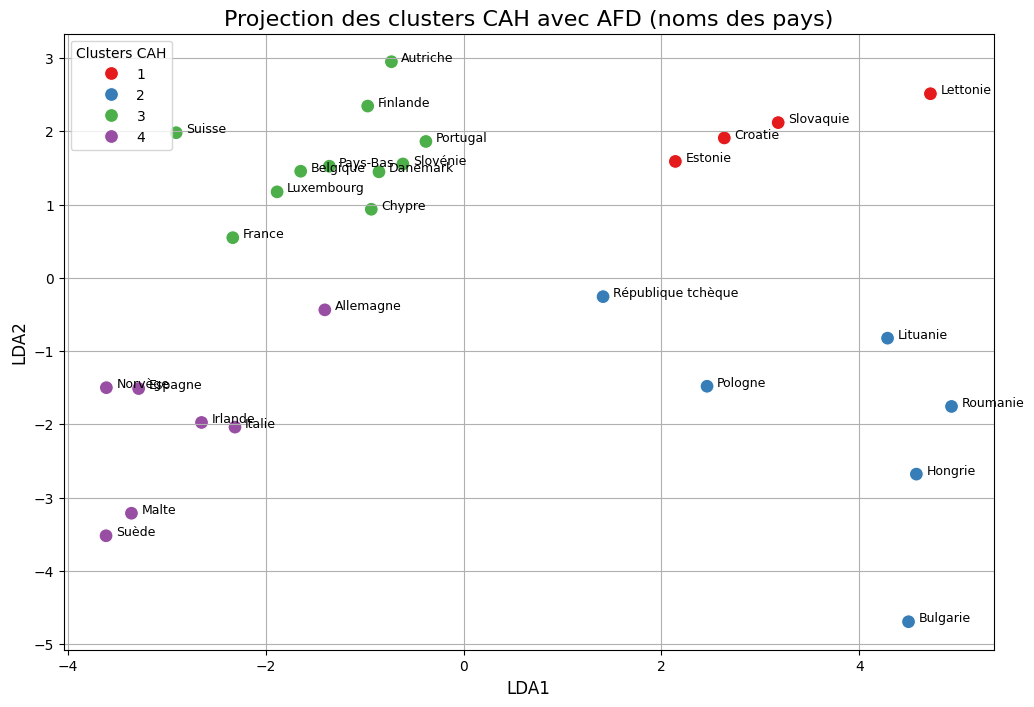

In [106]:
# 6. Visualisation 2D des clusters avec noms des pays
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='LDA1', y='LDA2', hue='Cluster_CAH', data=df_pivot_reset, palette='Set1', s=100
)

# Ajouter les noms des pays
for i in range(df_pivot_reset.shape[0]):
    plt.text(
        df_pivot_reset['LDA1'].iloc[i] + 0.1,
        df_pivot_reset['LDA2'].iloc[i],
        df_pivot_reset['geo\\TIME_PERIOD'].iloc[i],
        fontsize=9
    )

plt.title('Projection des clusters CAH avec AFD (noms des pays)', fontsize=16)
plt.xlabel('LDA1', fontsize=12)
plt.ylabel('LDA2', fontsize=12)
plt.legend(title='Clusters CAH', fontsize=10)
plt.grid(True)
plt.show()

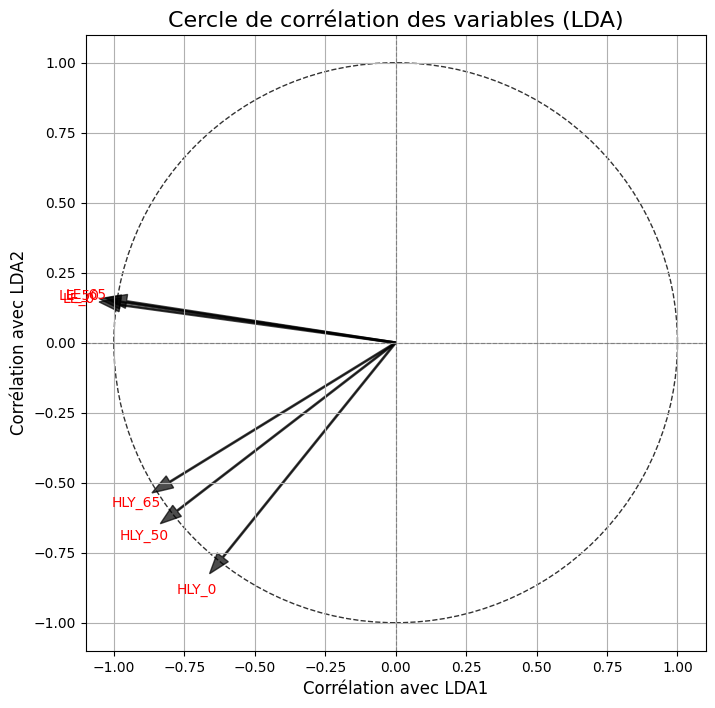

In [107]:
import numpy as np
import matplotlib.pyplot as plt

# Calculer les vecteurs de corrélation
corr_matrix = np.corrcoef(X.T, X_lda.T)  # Matrice de corrélation entre les variables et les composantes LDA
corr_x = corr_matrix[:-2, -2]  # Corrélation avec le premier axe LDA
corr_y = corr_matrix[:-2, -1]  # Corrélation avec le deuxième axe LDA

# Créer un graphique pour le cercle de corrélation
plt.figure(figsize=(8, 8))

# Tracer les vecteurs de corrélation pour chaque variable
for i, col in enumerate(['HLY_0', 'HLY_50', 'HLY_65', 'LE_0', 'LE_50', 'LE_65']):
    plt.arrow(0, 0, corr_x[i], corr_y[i], color='black', alpha=0.7, width=0.005, head_width=0.05)
    plt.text(corr_x[i] * 1.15, corr_y[i] * 1.15, col, color='red', ha='center', va='center', fontsize=10)

# Tracer le cercle de corrélation
circle = plt.Circle((0, 0), 1, color='black', fill=False, linestyle='--', alpha=0.8)
plt.gca().add_artist(circle)

# Ajouter des configurations pour le cercle de corrélation
plt.axhline(0, color='grey', linestyle='--', linewidth=0.8)
plt.axvline(0, color='grey', linestyle='--', linewidth=0.8)
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.title('Cercle de corrélation des variables (LDA)', fontsize=16)
plt.xlabel('Corrélation avec LDA1', fontsize=12)
plt.ylabel('Corrélation avec LDA2', fontsize=12)
plt.grid(True)

plt.show()


* LE_65 et LE_50 : Ces deux variables sont proches, suggérant une forte corrélation positive. Elles contribuent davantage à l'axe horizontal.
* HLY_65 et HLY_0 : Ces deux variables semblent proches et orientées différemment de LE_65 et LE_50, suggérant une opposition dans leur relation avec les dimensions.
* La longueur des flèches montre que les variables LE (espérance de vie) et HLY (années en bonne santé) influencent fortement la structure des données dans ce cadre.

In [108]:
import folium
from IPython.display import display


# Créer une carte interactive
m = folium.Map(location=[50, 10], zoom_start=4)

# Définir les couleurs pour chaque cluster
colors = {
    0: 'blue',
    1: 'orange',
    2: 'green',
    3: 'red'
}


# Vous pouvez obtenir les clusters directement à partir de votre DataFrame 'df_pivot_reset'
c = df_pivot_reset.set_index('geo\\TIME_PERIOD')['Cluster_CAH'].to_dict()


# Coordonnées des pays
country_coordinates = {
    'Finlande': [61.92, 25.75], 'Autriche': [47.52, 14.55],
    'Portugal': [39.40, -8.22], 'Danemark': [56.26, 9.50],
    'Slovénie': [46.15, 14.99], 'Belgique': [50.85, 4.35],
    'France': [46.23, 2.21], 'Suisse': [46.82, 8.23],
    'Luxembourg': [49.82, 6.13], 'République tchèque': [49.82, 15.47],
    'Pologne': [51.92, 19.15], 'Italie': [41.87, 12.57],
    'Espagne': [40.46, -3.75], 'Allemagne': [51.17, 10.45],
    'Irlande': [53.14, -7.69], 'Norvège': [60.47, 8.47],
    'Malte': [35.94, 14.38], 'Suède': [60.13, 18.64],
    'Bulgarie': [42.73, 25.49],
    'Estonie': [58.60, 25.01], 'Slovaquie': [48.67, 19.70],
    'Lettonie': [56.88, 24.60], 'Lituanie': [55.17, 23.88],
    'Croatie': [45.10, 15.20], 'Hongrie': [47.16, 19.50],
    'Roumanie': [45.94, 24.97]
}

# Créer une carte interactive
m = folium.Map(location=[50, 10], zoom_start=4)

# Définir les couleurs pour chaque cluster
colors = {
    0: 'blue',
    1: 'orange',
    2: 'green',
    3: 'red'
}

# Ajouter les marqueurs pour chaque pays
for country, coords in country_coordinates.items():
    if country in c:  # Vérifier si le pays existe dans les données
        cluster = c[country]
        color = colors.get(cluster, 'gray')  # Utiliser 'gray' si le cluster est inconnu

        folium.CircleMarker(
            location=coords,
            radius=10,
            popup=f"{country}<br>Cluster {cluster}",
            color=color,
            fill=True,
            fill_color=color,
            fill_opacity=0.7
        ).add_to(m)

# Ajouter une légende
legend_html = """
<div style="position: fixed; bottom: 50px; left: 50px; z-index: 1000;
            background-color: white; padding: 10px; border: 2px solid grey;
            border-radius: 5px">
    <p><b>Clusters des Pays Européens</b></p>
    <p><span style="color: blue;">●</span> Cluster 0: Europe Occidentale</p>
    <p><span style="color: orange;">●</span> Cluster 1: Grandes Économies</p>
    <p><span style="color: green;">●</span> Cluster 2: Bulgarie et Pays voisins</p>
    <p><span style="color: red;">●</span> Cluster 3: Europe du Nord et de l'Est</p>
</div>
"""
m.get_root().html.add_child(folium.Element(legend_html))

# Afficher la carte directement dans Colab
display(m)
